Introduction
============

This is interactive notebook regarding "Introduction to path planning". (Author: Björn Hein)

License is based on Creative Commons: Attribution-NonCommercial 4.0 International (CC BY-NC 4.0) (pls. check: http://creativecommons.org/licenses/by-nc/4.0/)

This notebook imports all discussed algorithms and does a comparison

**Attention**: This worksheet has external dependencies 

* to the files "InnoKonz2dEnv.py" or "InnoKonzShapelyEnv.py". These files contain simple 2D environments based on numpy arrays or the shapely library with an interface for the use as collision checking in the algorithms.
* to all modules like "**Algorithm**.py", which contains the corresponding algorithms 

Important links are:

* General Info: http://www.python.org
* Python tutorial http://www.python.org/doc/tut/
* NetworkX http://networkx.github.io/
* NumPy and SciPy Guide http://docs.scipy.org/
* Matplotlib gallery http://matplotlib.sourceforge.net/gallery.html


Remember that:

* you have to press ctrl-return or shift-return, to execute the code in the code sections, only then the variables are "generated" and can be used
* you can execute the whole notebook by Cell->runAll

Adding all planners
===========


In [28]:
import sys
import HelperClass
sys.path.append("templates")
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [29]:
from IPPerfMonitor import IPPerfMonitor

import IPVISBasicPRM
import IPBasicPRM_Roundtrip

import IPVisibilityPRM_Roundtrip
import IPVISVisibilityPRM
import Optimized_IPVisibilityPRM_Roundtrip
import Grid_IPVisibilityPRM_Roundtrip
import CC_IPVisibilityPRM_Roundtrip

import IPLazyPRM_Roundtrip
import IPVISLazyPRM


Set-up of the test scenario and the configuration for all planner
===================================

Following a procedure to compare all discussed planners are shown:

1. Configuration for every planner is defined
2. The configuration and the planner is stored in the variable setup, a Python dict()
3. the variable setup is then used to uniformly call the planning calls


In [30]:
plannerFactory = dict()

# basicConfig = dict()
# basicConfig["radius"] = 3
# basicConfig["numNodes"] = 200
# plannerFactory["basePRM"] = [IPBasicPRM_Roundtrip.BasicPRM, basicConfig, IPVISBasicPRM.basicPRMVisualize]


# visbilityConfig = dict()
# visbilityConfig["ntry"] = 300
# plannerFactory["visibilityPRM"] = [IPVisibilityPRM_Roundtrip.VisPRM, visbilityConfig, IPVISVisibilityPRM.visibilityPRMVisualize ]


# visbilityConfig = dict()
# visbilityConfig["ntry"] = 300
# plannerFactory["visibilityPRM"] = [CC_IPVisibilityPRM_Roundtrip.VisPRM, visbilityConfig, IPVISVisibilityPRM.visibilityPRMVisualize ]


# visbilityConfig = dict()
# visbilityConfig["ntry"] = 300
# plannerFactory["visibilityPRM"] = [Grid_IPVisibilityPRM_Roundtrip.VisPRM, visbilityConfig, IPVISVisibilityPRM.visibilityPRMVisualize ]


lazyConfig = dict()
lazyConfig["initialRoadmapSize"] = 10
lazyConfig["updateRoadmapSize"]  = 5
lazyConfig["kNearest"] = 8
plannerFactory["lazyPRM"] = [IPLazyPRM_Roundtrip.LazyPRM, lazyConfig, IPVISLazyPRM.lazyPRMVisualize]

In [31]:
class ResultCollection (object):
    
    def __init__(self, plannerFactoryName, planner, benchmark, solution, perfDataFrame):
        self.plannerFactoryName = plannerFactoryName
        self.planner = planner
        self.benchmark = benchmark
        self.solution = solution
        self.perfDataFrame = perfDataFrame

In [32]:
import IPTestSuite
import importlib

In [33]:
importlib.reload(IPTestSuite)

<module 'IPTestSuite' from 'c:\\Users\\andre\\OneDrive - Hochschule Karlsruhe\\HS Karlsruhe\\1. Semester\\Roboterprogrammierung\\Projekt\\Git\\RKIM23RobotProgramDS\\02_eigeneNotebooks\\IPTestSuite.py'>

In [34]:
fullBenchList = IPTestSuite.benchList

for benchmark in fullBenchList:
    print(benchmark.name)

Trap
Bottleneck
Fat bottleneck
B_rush
circle od death


In [35]:
resultList = list()
testList = fullBenchList[1:5]

for key,producer in list(plannerFactory.items()):
    HelperClass.HelperClass.printInColor(str(key)+" "+ str(producer), 'yellow')
    #print(key, producer)
    for benchmark in testList:
        HelperClass.HelperClass.printInColor("Planning: " + key + " - " + benchmark.name, 'yellow')
        #planner = IPBasicPRM.BasicPRM(benchmark.collisionChecker)
        planner = producer[0](benchmark.collisionChecker)
        IPPerfMonitor.clearData()
        

        try:
            resultList.append(ResultCollection(key,
                                        planner, 
                                        benchmark, 
                                        planner.planRoundPath(benchmark.startList,benchmark.interimGoalList,benchmark.goalList,producer[1]),
                                        IPPerfMonitor.dataFrame()),)
            #a = planner.planPath(benchmark.startList,benchmark.goalList,producer[1])
            # print("")


        except Exception as e:
            HelperClass.HelperClass.printInColor("PLANNING ERROR ! PLANNING ERROR ! PLANNING ERROR", 'red')
            HelperClass.HelperClass.printInColor(e, 'red')
            import traceback
            HelperClass.HelperClass.printInColor(traceback.print_exc(), 'red')

            pass

        

Erstes Ziel Interim:[[4, 4], 11.0, 'interim2']
try-Pfad nach Löschung von Start:  [0, 'interim2']
While beginnt


Aktueller Node (step):  0
Path im Check and CollisonUpdate [4, 15]
step [0.020288412882535578, 3.425125722749586]
******* Check Edges for Collision
Collison zwischen 0   start

Kollision erkannt
MaxTry: 1
TRYPATH-Umplanung nach Kollision: [4, 'interim2']

While beginnt


Aktueller Node (step):  4
Path im Check and CollisonUpdate [4, 15]
step [0.4611955282909739, 12.481756422808655]
******* Check Edges for Collision
Collison zwischen 4   start

Kollision erkannt
MaxTry: 2
TRYPATH-Umplanung nach Kollision: [10, 'interim2']

While beginnt


Aktueller Node (step):  10
Path im Check and CollisonUpdate [4, 15]
step [7.722778385477657, 12.965807358403937]
Removed nodeNumber mit Koordinaten: [7.722778385477657, 12.965807358403937]
Remove Nodenumer:  10

Kollision erkannt
MaxTry: 3
TRYPATH-Umplanung nach Kollision: [1, 4, 'interim2']

While beginnt


Aktueller Node (step):  1
Path im Check and CollisonUpdate [4, 15]
step [13.603304983194892, 16.039673825038605]
******* Check Edges for Collision
Keine Kollission erkannt


Ziel-Interim: [[18, 16], 4.396874012658546, 'interim1']


Aktueller Node (step):  4
Path im Check and CollisonUpdate [13.603304983194892, 16.039673825038605]
step [0.4611955282909739, 12.481756422808655]
******* Check Edges for Collision
Collison zwischen 4   1

Kollision erkannt
MaxTry: 4
TRYPATH-Umplanung nach Kollision: [8, 0, 'interim2']

While beginnt


Aktueller Node (step):  8
Path im Check and CollisonUpdate [13.603304983194892, 16.039673825038605]
step [15.143436510810098, 7.811827441503742]
******* Check Edges for Collision
Collison zwischen 8   1

Kollision erkannt
MaxTry: 5
TRYPATH-Umplanung nach Kollision: [5, 4, 'interim2']

While beginnt


Aktueller Node (step):  5
Path im Check and CollisonUpdate [13.603304983194892, 16.039673825038605]
step [17.861223106675748, 10.513866177209692]
******* Check Edges for Collision
Collison zwischen 5   1

Kollision erkannt
MaxTry: 6
TRYPATH-Umplanung nach Kollision: ['start', 28, 'interim2']

While beginnt


Aktueller Node (step):  start
Path im Check and CollisonUpdate [13.603304983194892, 16.039673825038605]
step [4, 15]
******* Check Edges for Collision
Keine Kollission erkannt


Ziel-Interim: [[4, 4], 11.0, 'interim2']
Ziel gleich geblieben:  [[4, 4], 11.0, 'interim2']


Aktueller Node (step):  28
Path im Check and CollisonUpdate [4, 15]
step [6.427081449830928, 9.024153351568977]
******* Check Edges for Collision
Collison zwischen 28   start

Kollision erkannt
MaxTry: 7
TRYPATH-Umplanung nach Kollision: [17, 4, 'interim2']

While beginnt


Aktueller Node (step):  17
Path im Check and CollisonUpdate [4, 15]
step [5.000705421647698, 13.611205382076776]
******* Check Edges for Collision
Keine Kollission erkannt


Ziel-Interim: [[4, 4], 9.66316098579428, 'interim2']


Aktueller Node (step):  4
Path im Check and CollisonUpdate [5.000705421647698, 13.611205382076776]
step [0.4611955282909739, 12.481756422808655]
******* Check Edges for Collision
Collison zwischen 4   17

Kollision erkannt
MaxTry: 8
TRYPATH-Umplanung nach Kollision: [12, 'interim2']

While beginnt


Aktueller Node (step):  12
Path im Check and CollisonUpdate [5.000705421647698, 13.611205382076776]
step [10.09305247192603, 6.021676063498877]
******* Check Edges for Collision
Collison zwischen 12   17

Kollision erkannt
MaxTry: 9
TRYPATH-Umplanung nach Kollision: [25, 'interim2']

While beginnt


Aktueller Node (step):  25
Path im Check and CollisonUpdate [5.000705421647698, 13.611205382076776]
step [2.0702569072178374, 8.560536543400124]
******* Check Edges for Collision
Collison zwischen 25   17

Kollision erkannt
MaxTry: 10
TRYPATH-Umplanung nach Kollision: [28, 'interim2']

While beginnt


Aktueller Node (step):  28
Path im Check and CollisonUpdate [5.000705421647698, 13.611205382076776]
step [6.427081449830928, 9.024153351568977]
******* Check Edges for Collision
Collison zwischen 28   17

Kollision erkannt
MaxTry: 11
TRYPATH-Umplanung nach Kollision: [15, 12, 'interim2']

While beginnt


Aktueller Node (step):  15
Path im Check and CollisonUpdate [5.000705421647698, 13.611205382076776]
step [12.175737231597367, 10.279390618596343]
******* Check Edges for Collision
Collison zwischen 15   17

Kollision erkannt
MaxTry: 12
TRYPATH-Umplanung nach Kollision: [20, 4, 'interim2']

While beginnt


Aktueller Node (step):  20
Path im Check and CollisonUpdate [5.000705421647698, 13.611205382076776]
step [4.2222844646300155, 20.98816110129192]
******* Check Edges for Collision
Keine Kollission erkannt


Ziel-Interim: [[18, 16], 14.6528903819696, 'interim1']


Aktueller Node (step):  4
Path im Check and CollisonUpdate [4.2222844646300155, 20.98816110129192]
step [0.4611955282909739, 12.481756422808655]
******* Check Edges for Collision
Collison zwischen 4   20

Kollision erkannt
MaxTry: 13
TRYPATH-Umplanung nach Kollision: [15, 12, 'interim2']

While beginnt


Aktueller Node (step):  15
Path im Check and CollisonUpdate [4.2222844646300155, 20.98816110129192]
step [12.175737231597367, 10.279390618596343]
******* Check Edges for Collision
Collison zwischen 15   20

Kollision erkannt
MaxTry: 14
TRYPATH-Umplanung nach Kollision: [14, 5, 4, 'interim2']

While beginnt


Aktueller Node (step):  14
Path im Check and CollisonUpdate [4.2222844646300155, 20.98816110129192]
step [14.787461556637592, 19.032517274766462]
******* Check Edges for Collision
Keine Kollission erkannt


Ziel-Interim: [[18, 16], 4.417755569498881, 'interim1']


Aktueller Node (step):  5
Path im Check and CollisonUpdate [14.787461556637592, 19.032517274766462]
step [17.861223106675748, 10.513866177209692]
******* Check Edges for Collision
Collison zwischen 5   14

Kollision erkannt
MaxTry: 15
TRYPATH-Umplanung nach Kollision: [2, 8, 0, 'interim2']

While beginnt


Aktueller Node (step):  2
Path im Check and CollisonUpdate [14.787461556637592, 19.032517274766462]
step [18.622337586616702, 14.250287852977639]
******* Check Edges for Collision
Keine Kollission erkannt


Ziel-Interim: [[18, 16], 1.857093608075129, 'interim1']


Aktueller Node (step):  8
Path im Check and CollisonUpdate [18.622337586616702, 14.250287852977639]
step [15.143436510810098, 7.811827441503742]
******* Check Edges for Collision
Collison zwischen 8   2

Kollision erkannt
MaxTry: 16
TRYPATH-Umplanung nach Kollision: [9, 0, 'interim2']

While beginnt


Aktueller Node (step):  9
Path im Check and CollisonUpdate [18.622337586616702, 14.250287852977639]
step [16.966697301381473, 2.77021426910247]
******* Check Edges for Collision
Collison zwischen 9   2

Kollision erkannt
MaxTry: 17
TRYPATH-Umplanung nach Kollision: [5, 4, 'interim2']

While beginnt


Aktueller Node (step):  5
Path im Check and CollisonUpdate [18.622337586616702, 14.250287852977639]
step [17.861223106675748, 10.513866177209692]
******* Check Edges for Collision
Collison zwischen 5   2

Kollision erkannt
MaxTry: 18
TRYPATH-Umplanung nach Kollision: [15, 12, 'interim2']

While beginnt


Aktueller Node (step):  15
Path im Check and CollisonUpdate [18.622337586616702, 14.250287852977639]
step [12.175737231597367, 10.279390618596343]
******* Check Edges for Collision
Collison zwischen 15   2

Kollision erkannt
MaxTry: 19
TRYPATH-Umplanung nach Kollision: ['interim0', 6, 0, 'interim2']

While beginnt


Aktueller Node (step):  interim0
Path im Check and CollisonUpdate [18.622337586616702, 14.250287852977639]
step [18, 3]
******* Check Edges for Collision
Collison zwischen interim0   2

Kollision erkannt
MaxTry: 20
TRYPATH-Umplanung nach Kollision: [7, 8, 0, 'interim2']

While beginnt


Aktueller Node (step):  7
Path im Check and CollisonUpdate [18.622337586616702, 14.250287852977639]
step [20.870168583262164, 14.21235834124499]
******* Check Edges for Collision
Keine Kollission erkannt


Ziel-Interim: [[18, 16], 3.3813503806114946, 'interim1']


Aktueller Node (step):  8
Path im Check and CollisonUpdate [20.870168583262164, 14.21235834124499]
step [15.143436510810098, 7.811827441503742]
******* Check Edges for Collision
Collison zwischen 8   7

Kollision erkannt
MaxTry: 21
TRYPATH-Umplanung nach Kollision: [5, 4, 'interim2']

While beginnt


Aktueller Node (step):  5
Path im Check and CollisonUpdate [20.870168583262164, 14.21235834124499]
step [17.861223106675748, 10.513866177209692]
******* Check Edges for Collision
Collison zwischen 5   7

Kollision erkannt
MaxTry: 22
TRYPATH-Umplanung nach Kollision: [9, 0, 'interim2']

While beginnt


Aktueller Node (step):  9
Path im Check and CollisonUpdate [20.870168583262164, 14.21235834124499]
step [16.966697301381473, 2.77021426910247]
******* Check Edges for Collision
Collison zwischen 9   7

Kollision erkannt
MaxTry: 23
TRYPATH-Umplanung nach Kollision: ['interim0', 6, 0, 'interim2']

While beginnt


Aktueller Node (step):  interim0
Path im Check and CollisonUpdate [20.870168583262164, 14.21235834124499]
step [18, 3]
******* Check Edges for Collision
Collison zwischen interim0   7

Kollision erkannt
MaxTry: 24
TRYPATH-Umplanung nach Kollision: [11, 8, 0, 'interim2']

While beginnt


Aktueller Node (step):  11
Path im Check and CollisonUpdate [20.870168583262164, 14.21235834124499]
step [17.756971053162104, 9.710228382880524]
******* Check Edges for Collision
Collison zwischen 11   7

Kollision erkannt
MaxTry: 25
TRYPATH-Umplanung nach Kollision: [27, 8, 0, 'interim2']

While beginnt


Aktueller Node (step):  27
Path im Check and CollisonUpdate [20.870168583262164, 14.21235834124499]
step [17.740152558613737, 9.822253092868825]
******* Check Edges for Collision
Collison zwischen 27   7

Kollision erkannt
MaxTry: 26
TRYPATH-Umplanung nach Kollision: [32, 8, 0, 'interim2']

While beginnt


Aktueller Node (step):  32
Path im Check and CollisonUpdate [20.870168583262164, 14.21235834124499]
step [19.415070270531785, 12.743774397063753]
Removed nodeNumber mit Koordinaten: [19.415070270531785, 12.743774397063753]
Remove Nodenumer:  32

Kollision erkannt
MaxTry: 27
TRYPATH-Umplanung nach Kollision: ['interim1', 5, 4, 'interim2']

While beginnt


Aktueller Node (step):  interim1
Path im Check and CollisonUpdate [20.870168583262164, 14.21235834124499]
step [18, 16]
******* Check Edges for Collision
Keine Kollission erkannt


Ziel-Interim: [[18, 16], 0.0, 'interim1']
Interim ist erreicht!
SubPath rein:  ['start', 1, 'start', 17, 20, 14, 2, 7, 'interim1']
Modifizierter Pfad:  ['start', 17, 20, 14, 2, 7, 'interim1']
checkedInterimGoalList:  [[18, 3], [18, 16], [4, 4], [18, 1]]
checkedInterimGoalList:  [[18, 3], [4, 4], [18, 1]]
Gerade entfernt:  [18, 16]
Neues Ziel-Interim verfügbar!:  [[18, 3], 13.0, 'interim0']
Neuer TRYPATH nachdem Ziel erreicht['interim1', 5, 'interim0']
interim1  aus Trypath entfernt
While beginnt


Aktueller Node (step):  5
Path im Check and CollisonUpdate [18, 16]
step [17.861223106675748, 10.513866177209692]
******* Check Edges for Collision
Collison zwischen 5   interim1

Kollision erkannt
MaxTry: 28
TRYPATH-Umplanung nach Kollision: [11, 'interim0']

While beginnt


Aktueller Node (step):  11
Path im Check and CollisonUpdate [18, 16]
step [17.756971053162104, 9.710228382880524]
******* Check Edges for Collision
Collison zwischen 11   interim1

Kollision erkannt
MaxTry: 29
TRYPATH-Umplanung nach Kollision: [2, 11, 'interim0']

While beginnt


Aktueller Node (step):  2
Path im Check and CollisonUpdate [18, 16]
step [18.622337586616702, 14.250287852977639]
******* Check Edges for Collision
Keine Kollission erkannt


Ziel-Interim: [[18, 3], 11.267487778851686, 'interim0']


Aktueller Node (step):  11
Path im Check and CollisonUpdate [18.622337586616702, 14.250287852977639]
step [17.756971053162104, 9.710228382880524]
******* Check Edges for Collision
Collison zwischen 11   2

Kollision erkannt
MaxTry: 30
TRYPATH-Umplanung nach Kollision: [27, 5, 'interim0']

While beginnt


Aktueller Node (step):  27
Path im Check and CollisonUpdate [18.622337586616702, 14.250287852977639]
step [17.740152558613737, 9.822253092868825]
******* Check Edges for Collision
Collison zwischen 27   2

Kollision erkannt
MaxTry: 31
TRYPATH-Umplanung nach Kollision: [38, 5, 'interim0']

While beginnt


Aktueller Node (step):  38
Path im Check and CollisonUpdate [18.622337586616702, 14.250287852977639]
step [16.767164336473584, 12.5788670834218]
Removed nodeNumber mit Koordinaten: [16.767164336473584, 12.5788670834218]
Remove Nodenumer:  38

Kollision erkannt
MaxTry: 32
TRYPATH-Umplanung nach Kollision: [14, 11, 'interim0']

While beginnt


Aktueller Node (step):  14
Path im Check and CollisonUpdate [18.622337586616702, 14.250287852977639]
step [14.787461556637592, 19.032517274766462]
******* Check Edges for Collision
Keine Kollission erkannt


Ziel-Interim: [[18, 3], 16.35120831668921, 'interim0']


Aktueller Node (step):  11
Path im Check and CollisonUpdate [14.787461556637592, 19.032517274766462]
step [17.756971053162104, 9.710228382880524]
******* Check Edges for Collision
Collison zwischen 11   14

Kollision erkannt
MaxTry: 33
TRYPATH-Umplanung nach Kollision: [1, 15, 5, 'interim0']

While beginnt


Aktueller Node (step):  1
Path im Check and CollisonUpdate [14.787461556637592, 19.032517274766462]
step [13.603304983194892, 16.039673825038605]
******* Check Edges for Collision
Keine Kollission erkannt


Ziel-Interim: [[18, 3], 13.760960014991534, 'interim0']


Aktueller Node (step):  15
Path im Check and CollisonUpdate [13.603304983194892, 16.039673825038605]
step [12.175737231597367, 10.279390618596343]
******* Check Edges for Collision
Collison zwischen 15   1

Kollision erkannt
MaxTry: 34
TRYPATH-Umplanung nach Kollision: [56, 5, 'interim0']

While beginnt


Aktueller Node (step):  56
Path im Check and CollisonUpdate [13.603304983194892, 16.039673825038605]
step [15.835856263565827, 14.062839547897386]
******* Check Edges for Collision
Keine Kollission erkannt


Ziel-Interim: [[18, 3], 11.272530193992372, 'interim0']


Aktueller Node (step):  5
Path im Check and CollisonUpdate [15.835856263565827, 14.062839547897386]
step [17.861223106675748, 10.513866177209692]
******* Check Edges for Collision
Collison zwischen 5   56

Kollision erkannt
MaxTry: 35
TRYPATH-Umplanung nach Kollision: [45, 11, 'interim0']

While beginnt


Aktueller Node (step):  45
Path im Check and CollisonUpdate [15.835856263565827, 14.062839547897386]
step [17.083308015909267, 10.089834671120341]
******* Check Edges for Collision
Collison zwischen 45   56

Kollision erkannt
MaxTry: 36
TRYPATH-Umplanung nach Kollision: [68, 5, 'interim0']

While beginnt


Aktueller Node (step):  68
Path im Check and CollisonUpdate [15.835856263565827, 14.062839547897386]
step [17.543455470856774, 12.744821723786439]
Removed nodeNumber mit Koordinaten: [17.543455470856774, 12.744821723786439]
Remove Nodenumer:  68

Kollision erkannt
MaxTry: 37
TRYPATH-Umplanung nach Kollision: [110, 5, 'interim0']

While beginnt


Aktueller Node (step):  110
Path im Check and CollisonUpdate [15.835856263565827, 14.062839547897386]
step [17.064436288123037, 12.338241418968433]
******* Check Edges for Collision
Collison zwischen 110   56

Kollision erkannt
MaxTry: 38
TRYPATH-Umplanung nach Kollision: [114, 5, 'interim0']

While beginnt


Aktueller Node (step):  114
Path im Check and CollisonUpdate [15.835856263565827, 14.062839547897386]
step [16.37369164656562, 12.891332747913388]
Removed nodeNumber mit Koordinaten: [16.37369164656562, 12.891332747913388]
Remove Nodenumer:  114

Kollision erkannt
MaxTry: 39
TRYPATH-Umplanung nach Kollision: [72, 15, 5, 'interim0']

While beginnt


Aktueller Node (step):  72
Path im Check and CollisonUpdate [15.835856263565827, 14.062839547897386]
step [12.651530705527907, 13.496000043631234]
******* Check Edges for Collision
Keine Kollission erkannt


Ziel-Interim: [[18, 3], 11.78015877269138, 'interim0']


Aktueller Node (step):  15
Path im Check and CollisonUpdate [12.651530705527907, 13.496000043631234]
step [12.175737231597367, 10.279390618596343]
******* Check Edges for Collision
Collison zwischen 15   72

Kollision erkannt
MaxTry: 40
TRYPATH-Umplanung nach Kollision: [50, 8, 'interim0']

While beginnt


Aktueller Node (step):  50
Path im Check and CollisonUpdate [12.651530705527907, 13.496000043631234]
step [11.196484769111564, 8.828710179540142]
******* Check Edges for Collision
Collison zwischen 50   72

Kollision erkannt
MaxTry: 41
TRYPATH-Umplanung nach Kollision: [94, 8, 'interim0']

While beginnt


Aktueller Node (step):  94
Path im Check and CollisonUpdate [12.651530705527907, 13.496000043631234]
step [13.982144215800965, 10.950739263898496]
******* Check Edges for Collision
Collison zwischen 94   72

Kollision erkannt
MaxTry: 42
TRYPATH-Umplanung nach Kollision: [52, 15, 5, 'interim0']

While beginnt


Aktueller Node (step):  52
Path im Check and CollisonUpdate [12.651530705527907, 13.496000043631234]
step [9.496784177764097, 13.090536962946587]
Removed nodeNumber mit Koordinaten: [9.496784177764097, 13.090536962946587]
Remove Nodenumer:  52

Kollision erkannt
MaxTry: 43
TRYPATH-Umplanung nach Kollision: [53, 15, 5, 'interim0']

While beginnt


Aktueller Node (step):  53
Path im Check and CollisonUpdate [12.651530705527907, 13.496000043631234]
step [9.384779715069389, 13.826035678177366]
******* Check Edges for Collision
Keine Kollission erkannt


Ziel-Interim: [[4, 4], 11.204768169339216, 'interim2']


Aktueller Node (step):  15
Path im Check and CollisonUpdate [9.384779715069389, 13.826035678177366]
step [12.175737231597367, 10.279390618596343]
******* Check Edges for Collision
Collison zwischen 15   53

Kollision erkannt
MaxTry: 44
TRYPATH-Umplanung nach Kollision: [36, 8, 'interim0']

While beginnt


Aktueller Node (step):  36
Path im Check and CollisonUpdate [9.384779715069389, 13.826035678177366]
step [9.2618401164808, 9.073304294881009]
******* Check Edges for Collision
Collison zwischen 36   53

Kollision erkannt
MaxTry: 45
TRYPATH-Umplanung nach Kollision: [17, 36, 8, 'interim0']

While beginnt


Aktueller Node (step):  17
Path im Check and CollisonUpdate [9.384779715069389, 13.826035678177366]
step [5.000705421647698, 13.611205382076776]
******* Check Edges for Collision
Keine Kollission erkannt


Ziel-Interim: [[4, 4], 9.66316098579428, 'interim2']


Aktueller Node (step):  36
Path im Check and CollisonUpdate [5.000705421647698, 13.611205382076776]
step [9.2618401164808, 9.073304294881009]
******* Check Edges for Collision
Collison zwischen 36   17

Kollision erkannt
MaxTry: 46
TRYPATH-Umplanung nach Kollision: [19, 15, 5, 'interim0']

While beginnt


Aktueller Node (step):  19
Path im Check and CollisonUpdate [5.000705421647698, 13.611205382076776]
step [9.53133513027925, 19.16162647244848]
******* Check Edges for Collision
Keine Kollission erkannt


Ziel-Interim: [[4, 4], 16.139101140197116, 'interim2']


Aktueller Node (step):  15
Path im Check and CollisonUpdate [9.53133513027925, 19.16162647244848]
step [12.175737231597367, 10.279390618596343]
******* Check Edges for Collision
Collison zwischen 15   19

Kollision erkannt
MaxTry: 47
TRYPATH-Umplanung nach Kollision: [17, 48, 4, 5, 'interim0']

While beginnt


Aktueller Node (step):  17
Path im Check and CollisonUpdate [9.53133513027925, 19.16162647244848]
step [5.000705421647698, 13.611205382076776]
******* Check Edges for Collision
Keine Kollission erkannt


Ziel-Interim: [[4, 4], 9.66316098579428, 'interim2']


Aktueller Node (step):  48
Path im Check and CollisonUpdate [5.000705421647698, 13.611205382076776]
step [0.30376654081354215, 14.606377497260292]
******* Check Edges for Collision
Keine Kollission erkannt


Ziel-Interim: [[4, 4], 11.231980475374723, 'interim2']


Aktueller Node (step):  4
Path im Check and CollisonUpdate [0.30376654081354215, 14.606377497260292]
step [0.4611955282909739, 12.481756422808655]
******* Check Edges for Collision
Collison zwischen 4   48

Kollision erkannt
MaxTry: 48
TRYPATH-Umplanung nach Kollision: [25, 4, 5, 'interim0']

While beginnt


Aktueller Node (step):  25
Path im Check and CollisonUpdate [0.30376654081354215, 14.606377497260292]
step [2.0702569072178374, 8.560536543400124]
******* Check Edges for Collision
Collison zwischen 25   48

Kollision erkannt
MaxTry: 49
TRYPATH-Umplanung nach Kollision: [34, 4, 5, 'interim0']

While beginnt


Aktueller Node (step):  34
Path im Check and CollisonUpdate [0.30376654081354215, 14.606377497260292]
step [1.8320205773665734, 8.252134715846873]
******* Check Edges for Collision
Collison zwischen 34   48

Kollision erkannt
MaxTry: 50
TRYPATH-Umplanung nach Kollision: [129, 4, 5, 'interim0']

While beginnt


Aktueller Node (step):  129
Path im Check and CollisonUpdate [0.30376654081354215, 14.606377497260292]
step [1.7422347434569045, 14.143097979970301]
******* Check Edges for Collision
Keine Kollission erkannt


Ziel-Interim: [[4, 4], 10.391339691537887, 'interim2']


Aktueller Node (step):  4
Path im Check and CollisonUpdate [1.7422347434569045, 14.143097979970301]
step [0.4611955282909739, 12.481756422808655]
******* Check Edges for Collision
Collison zwischen 4   129

Kollision erkannt
MaxTry: 51
TRYPATH-Umplanung nach Kollision: [151, 4, 5, 'interim0']

While beginnt


Aktueller Node (step):  151
Path im Check and CollisonUpdate [1.7422347434569045, 14.143097979970301]
step [1.1646137624392705, 13.357428940811753]
Removed nodeNumber mit Koordinaten: [1.1646137624392705, 13.357428940811753]
Remove Nodenumer:  151

Kollision erkannt
MaxTry: 52
TRYPATH-Umplanung nach Kollision: [167, 4, 5, 'interim0']

While beginnt


Aktueller Node (step):  167
Path im Check and CollisonUpdate [1.7422347434569045, 14.143097979970301]
step [0.6756446631527617, 11.337536115020757]
******* Check Edges for Collision
Collison zwischen 167   129

Kollision erkannt
MaxTry: 53
TRYPATH-Umplanung nach Kollision: [48, 167, 4, 5, 'interim0']

While beginnt


Aktueller Node (step):  48
Path im Check and CollisonUpdate [1.7422347434569045, 14.143097979970301]
step [0.30376654081354215, 14.606377497260292]
******* Check Edges for Collision
Keine Kollission erkannt


Ziel-Interim: [[4, 4], 11.231980475374723, 'interim2']


Aktueller Node (step):  167
Path im Check and CollisonUpdate [0.30376654081354215, 14.606377497260292]
step [0.6756446631527617, 11.337536115020757]
******* Check Edges for Collision
Collison zwischen 167   48

Kollision erkannt
MaxTry: 54
TRYPATH-Umplanung nach Kollision: [17, 49, 36, 8, 'interim0']

While beginnt


Aktueller Node (step):  17
Path im Check and CollisonUpdate [0.30376654081354215, 14.606377497260292]
step [5.000705421647698, 13.611205382076776]
******* Check Edges for Collision
Keine Kollission erkannt


Ziel-Interim: [[4, 4], 9.66316098579428, 'interim2']


Aktueller Node (step):  49
Path im Check and CollisonUpdate [5.000705421647698, 13.611205382076776]
step [5.2717859940204574, 8.882929873766587]
******* Check Edges for Collision
Collison zwischen 49   17

Kollision erkannt
MaxTry: 55
TRYPATH-Umplanung nach Kollision: [60, 25, 4, 5, 'interim0']

While beginnt


Aktueller Node (step):  60
Path im Check and CollisonUpdate [5.000705421647698, 13.611205382076776]
step [4.730291335857255, 11.55548087510084]
******* Check Edges for Collision
Collison zwischen 60   17

Kollision erkannt
MaxTry: 56
TRYPATH-Umplanung nach Kollision: [129, 286, 4, 5, 'interim0']

While beginnt


Aktueller Node (step):  129
Path im Check and CollisonUpdate [5.000705421647698, 13.611205382076776]
step [1.7422347434569045, 14.143097979970301]
******* Check Edges for Collision
Keine Kollission erkannt


Ziel-Interim: [[4, 4], 10.391339691537887, 'interim2']


Aktueller Node (step):  286
Path im Check and CollisonUpdate [1.7422347434569045, 14.143097979970301]
step [1.450150785687074, 11.931591598873675]
******* Check Edges for Collision
Collison zwischen 286   129

Kollision erkannt
MaxTry: 57
TRYPATH-Umplanung nach Kollision: [294, 4, 5, 'interim0']

While beginnt


Aktueller Node (step):  294
Path im Check and CollisonUpdate [1.7422347434569045, 14.143097979970301]
step [0.2979176753733499, 15.119406535001199]
******* Check Edges for Collision
Keine Kollission erkannt


Ziel-Interim: [[4, 4], 11.719497225945336, 'interim2']


Aktueller Node (step):  4
Path im Check and CollisonUpdate [0.2979176753733499, 15.119406535001199]
step [0.4611955282909739, 12.481756422808655]
******* Check Edges for Collision
Collison zwischen 4   294

Kollision erkannt
MaxTry: 58
TRYPATH-Umplanung nach Kollision: [155, 167, 4, 5, 'interim0']

While beginnt


Aktueller Node (step):  155
Path im Check and CollisonUpdate [0.2979176753733499, 15.119406535001199]
step [2.5968184972281367, 14.500266440103353]
******* Check Edges for Collision
Keine Kollission erkannt


Ziel-Interim: [[4, 4], 10.593607206371296, 'interim2']


Aktueller Node (step):  167
Path im Check and CollisonUpdate [2.5968184972281367, 14.500266440103353]
step [0.6756446631527617, 11.337536115020757]
******* Check Edges for Collision
Collison zwischen 167   155

Kollision erkannt
MaxTry: 59
TRYPATH-Umplanung nach Kollision: [286, 4, 5, 'interim0']

While beginnt


Aktueller Node (step):  286
Path im Check and CollisonUpdate [2.5968184972281367, 14.500266440103353]
step [1.450150785687074, 11.931591598873675]
******* Check Edges for Collision
Collison zwischen 286   155

Kollision erkannt
MaxTry: 60
TRYPATH-Umplanung nach Kollision: [253, 286, 4, 5, 'interim0']

While beginnt


Aktueller Node (step):  253
Path im Check and CollisonUpdate [2.5968184972281367, 14.500266440103353]
step [3.2226419957711308, 12.641424113971386]
Removed nodeNumber mit Koordinaten: [3.2226419957711308, 12.641424113971386]
Remove Nodenumer:  253

Kollision erkannt
MaxTry: 61
TRYPATH-Umplanung nach Kollision: [109, 60, 25, 4, 5, 'interim0']

While beginnt


Aktueller Node (step):  109
Path im Check and CollisonUpdate [2.5968184972281367, 14.500266440103353]
step [3.8295105213361396, 14.112892254337487]
******* Check Edges for Collision
Keine Kollission erkannt


Ziel-Interim: [[4, 4], 10.114329261506875, 'interim2']


Aktueller Node (step):  60
Path im Check and CollisonUpdate [3.8295105213361396, 14.112892254337487]
step [4.730291335857255, 11.55548087510084]
******* Check Edges for Collision
Collison zwischen 60   109

Kollision erkannt
MaxTry: 62
TRYPATH-Umplanung nach Kollision: [44, 28, 12, 6, 'interim0']

While beginnt


Aktueller Node (step):  44
Path im Check and CollisonUpdate [3.8295105213361396, 14.112892254337487]
step [6.354703943176174, 15.050126744306235]
******* Check Edges for Collision
Keine Kollission erkannt


Ziel-Interim: [[4, 4], 11.298226928383114, 'interim2']


Aktueller Node (step):  28
Path im Check and CollisonUpdate [6.354703943176174, 15.050126744306235]
step [6.427081449830928, 9.024153351568977]
******* Check Edges for Collision
Collison zwischen 28   44

Kollision erkannt
MaxTry: 63
TRYPATH-Umplanung nach Kollision: [60, 25, 4, 5, 'interim0']

While beginnt


Aktueller Node (step):  60
Path im Check and CollisonUpdate [6.354703943176174, 15.050126744306235]
step [4.730291335857255, 11.55548087510084]
******* Check Edges for Collision
Collison zwischen 60   44

Kollision erkannt
MaxTry: 64
TRYPATH-Umplanung nach Kollision: [69, 28, 15, 5, 'interim0']

While beginnt


Aktueller Node (step):  69
Path im Check and CollisonUpdate [6.354703943176174, 15.050126744306235]
step [6.48307239008169, 12.551643396020344]
Removed nodeNumber mit Koordinaten: [6.48307239008169, 12.551643396020344]
Remove Nodenumer:  69

Kollision erkannt
MaxTry: 65
TRYPATH-Umplanung nach Kollision: [53, 156, 36, 8, 'interim0']

While beginnt


Aktueller Node (step):  53
Path im Check and CollisonUpdate [6.354703943176174, 15.050126744306235]
step [9.384779715069389, 13.826035678177366]
******* Check Edges for Collision
Keine Kollission erkannt


Ziel-Interim: [[4, 4], 11.204768169339216, 'interim2']


Aktueller Node (step):  156
Path im Check and CollisonUpdate [9.384779715069389, 13.826035678177366]
step [8.495038631084146, 11.316933951870569]
******* Check Edges for Collision
Collison zwischen 156   53

Kollision erkannt
MaxTry: 66
TRYPATH-Umplanung nach Kollision: [72, 237, 94, 8, 'interim0']

While beginnt


Aktueller Node (step):  72
Path im Check and CollisonUpdate [9.384779715069389, 13.826035678177366]
step [12.651530705527907, 13.496000043631234]
******* Check Edges for Collision
Keine Kollission erkannt


Ziel-Interim: [[18, 3], 11.78015877269138, 'interim0']


Aktueller Node (step):  237
Path im Check and CollisonUpdate [12.651530705527907, 13.496000043631234]
step [14.68842566789377, 11.708975982319226]
******* Check Edges for Collision
Collison zwischen 237   72

Kollision erkannt
MaxTry: 67
TRYPATH-Umplanung nach Kollision: [312, 15, 5, 'interim0']

While beginnt


Aktueller Node (step):  312
Path im Check and CollisonUpdate [12.651530705527907, 13.496000043631234]
step [11.638464852935039, 12.379108260738867]
******* Check Edges for Collision
Keine Kollission erkannt


Ziel-Interim: [[18, 3], 11.332996126091409, 'interim0']


Aktueller Node (step):  15
Path im Check and CollisonUpdate [11.638464852935039, 12.379108260738867]
step [12.175737231597367, 10.279390618596343]
******* Check Edges for Collision
Keine Kollission erkannt


Ziel-Interim: [[18, 3], 9.322637211299686, 'interim0']


Aktueller Node (step):  5
Path im Check and CollisonUpdate [12.175737231597367, 10.279390618596343]
step [17.861223106675748, 10.513866177209692]
******* Check Edges for Collision
Keine Kollission erkannt


Ziel-Interim: [[18, 3], 7.515147633622145, 'interim0']


Aktueller Node (step):  interim0
Path im Check and CollisonUpdate [17.861223106675748, 10.513866177209692]
step [18, 3]
******* Check Edges for Collision
Keine Kollission erkannt


Ziel-Interim: [[18, 3], 0.0, 'interim0']
Interim ist erreicht!
SubPath rein:  ['interim1', 2, 14, 1, 56, 72, 53, 17, 19, 17, 48, 129, 48, 17, 129, 294, 155, 109, 44, 53, 72, 312, 15, 5, 'interim0']
Modifizierter Pfad:  ['start', 17, 20, 14, 2, 7, 'interim1', 2, 14, 1, 56, 72, 312, 15, 5, 'interim0']
checkedInterimGoalList:  [[18, 3], [4, 4], [18, 1]]
checkedInterimGoalList:  [[4, 4], [18, 1]]
Gerade entfernt:  [18, 3]
Neues Ziel-Interim verfügbar!:  [[18, 1], 2.0, 'interim3']
Neuer TRYPATH nachdem Ziel erreicht['interim0', 6, 'interim3']
interim0  aus Trypath entfernt
While beginnt


Aktueller Node (step):  6
Path im Check and CollisonUpdate [18, 3]
step [14.739889131180968, 2.3414047331146373]
******* Check Edges for Collision
Keine Kollission erkannt


Ziel-Interim: [[18, 1], 3.5252928296829946, 'interim3']


Aktueller Node (step):  interim3
Path im Check and CollisonUpdate [14.739889131180968, 2.3414047331146373]
step [18, 1]
******* Check Edges for Collision
Keine Kollission erkannt


Ziel-Interim: [[18, 1], 0.0, 'interim3']
Interim ist erreicht!
SubPath rein:  ['interim0', 6, 'interim3']
Modifizierter Pfad:  ['start', 17, 20, 14, 2, 7, 'interim1', 2, 14, 1, 56, 72, 312, 15, 5, 'interim0', 6, 'interim3']
checkedInterimGoalList:  [[4, 4], [18, 1]]
checkedInterimGoalList:  [[4, 4]]
Gerade entfernt:  [18, 1]
Neues Ziel-Interim verfügbar!:  [[4, 4], 14.317821063276353, 'interim2']
Neuer TRYPATH nachdem Ziel erreicht['interim3', 3, 'interim2']
interim3  aus Trypath entfernt
While beginnt


Aktueller Node (step):  3
Path im Check and CollisonUpdate [18, 1]
step [7.037450388657314, 1.255706155727506]
******* Check Edges for Collision
Keine Kollission erkannt


Ziel-Interim: [[4, 4], 4.093562454301433, 'interim2']


Aktueller Node (step):  interim2
Path im Check and CollisonUpdate [7.037450388657314, 1.255706155727506]
step [4, 4]
******* Check Edges for Collision
Keine Kollission erkannt


Ziel-Interim: [[4, 4], 0.0, 'interim2']
Interim ist erreicht!
SubPath rein:  ['interim3', 3, 'interim2']
Modifizierter Pfad:  ['start', 17, 20, 14, 2, 7, 'interim1', 2, 14, 1, 56, 72, 312, 15, 5, 'interim0', 6, 'interim3', 3, 'interim2']


Erstes Ziel Interim:[[18, 16], 14.866068747318506, 'interim2']
try-Pfad nach Löschung von Start:  [2, 'interim2']
While beginnt


Aktueller Node (step):  2
Path im Check and CollisonUpdate [4, 21]
step [9.046726453034887, 19.086187464781524]
******* Check Edges for Collision
Keine Kollission erkannt


Ziel-Interim: [[18, 16], 9.47025133111893, 'interim2']


Aktueller Node (step):  interim2
Path im Check and CollisonUpdate [9.046726453034887, 19.086187464781524]
step [18, 16]
******* Check Edges for Collision
Keine Kollission erkannt


Ziel-Interim: [[18, 16], 0.0, 'interim2']
Interim ist erreicht!
SubPath rein:  ['start', 2, 'interim2']
Modifizierter Pfad:  ['start', 2, 'interim2']
checkedInterimGoalList:  [[18, 4], [4, 4], [18, 16], [18, 1]]
checkedInterimGoalList:  [[18, 4], [4, 4], [18, 1]]
Gerade entfernt:  [18, 16]
Neues Ziel-Interim verfügbar!:  [[18, 4], 12.0, 'interim0']
Neuer TRYPATH nachdem Ziel erreicht['interim2', 1, 'interim0']
interim2  aus Trypath entfernt
While beginnt


Aktueller Node (step):  1
Path im Check and CollisonUpdate [18, 16]
step [18.559522276416534, 6.993464068314777]
******* Check Edges for Collision
Collison zwischen 1   interim2

Kollision erkannt
MaxTry: 1
TRYPATH-Umplanung nach Kollision: [14, 'interim0']

While beginnt


Aktueller Node (step):  14
Path im Check and CollisonUpdate [18, 16]
step [21.068153386788172, 4.1226051398962]
******* Check Edges for Collision
Collison zwischen 14   interim2

Kollision erkannt
MaxTry: 2
TRYPATH-Umplanung nach Kollision: [11, 17, 'interim0']

While beginnt


Aktueller Node (step):  11
Path im Check and CollisonUpdate [18, 16]
step [9.860285803773346, 13.873981195003282]
Removed nodeNumber mit Koordinaten: [9.860285803773346, 13.873981195003282]
Remove Nodenumer:  11

Kollision erkannt
MaxTry: 3
TRYPATH-Umplanung nach Kollision: [13, 1, 'interim0']

While beginnt


Aktueller Node (step):  13
Path im Check and CollisonUpdate [18, 16]
step [13.561026364632648, 16.207369030282372]
******* Check Edges for Collision
Keine Kollission erkannt


Ziel-Interim: [[18, 4], 12.989393580032273, 'interim0']


Aktueller Node (step):  1
Path im Check and CollisonUpdate [13.561026364632648, 16.207369030282372]
step [18.559522276416534, 6.993464068314777]
******* Check Edges for Collision
Collison zwischen 1   13

Kollision erkannt
MaxTry: 4
TRYPATH-Umplanung nach Kollision: [6, 1, 'interim0']

While beginnt


Aktueller Node (step):  6
Path im Check and CollisonUpdate [13.561026364632648, 16.207369030282372]
step [8.763497044199653, 11.385488085727363]
Removed nodeNumber mit Koordinaten: [8.763497044199653, 11.385488085727363]
Remove Nodenumer:  6

Kollision erkannt
MaxTry: 5
TRYPATH-Umplanung nach Kollision: [9, 3, 'interim0']

While beginnt


Aktueller Node (step):  9
Path im Check and CollisonUpdate [13.561026364632648, 16.207369030282372]
step [6.390129596678006, 15.099362891032868]
Removed nodeNumber mit Koordinaten: [6.390129596678006, 15.099362891032868]
Remove Nodenumer:  9

Kollision erkannt
MaxTry: 6
TRYPATH-Umplanung nach Kollision: [34, 1, 'interim0']

While beginnt


Aktueller Node (step):  34
Path im Check and CollisonUpdate [13.561026364632648, 16.207369030282372]
step [19.98478029505185, 13.52032755603381]
Removed nodeNumber mit Koordinaten: [19.98478029505185, 13.52032755603381]
Remove Nodenumer:  34

Kollision erkannt
MaxTry: 7
TRYPATH-Umplanung nach Kollision: [36, 1, 'interim0']

While beginnt


Aktueller Node (step):  36
Path im Check and CollisonUpdate [13.561026364632648, 16.207369030282372]
step [19.75917651496066, 14.48181849254308]
Removed nodeNumber mit Koordinaten: [19.75917651496066, 14.48181849254308]
Remove Nodenumer:  36

Kollision erkannt
MaxTry: 8
TRYPATH-Umplanung nach Kollision: [8, 0, 3, 'interim0']

While beginnt


Aktueller Node (step):  8
Path im Check and CollisonUpdate [13.561026364632648, 16.207369030282372]
step [12.092643468101615, 19.595995836115353]
******* Check Edges for Collision
Keine Kollission erkannt


Ziel-Interim: [[18, 4], 16.677288368169748, 'interim0']


Aktueller Node (step):  0
Path im Check and CollisonUpdate [12.092643468101615, 19.595995836115353]
step [3.6490352737600964, 10.521623012242378]
Removed nodeNumber mit Koordinaten: [3.6490352737600964, 10.521623012242378]
Remove Nodenumer:  0

Kollision erkannt
MaxTry: 9
TRYPATH-Umplanung nach Kollision: ['interim2', 47, 1, 'interim0']

While beginnt


Aktueller Node (step):  interim2
Path im Check and CollisonUpdate [12.092643468101615, 19.595995836115353]
step [18, 16]
******* Check Edges for Collision
Keine Kollission erkannt


Ziel-Interim: [[18, 4], 12.0, 'interim0']
Ziel gleich geblieben:  [[18, 4], 12.0, 'interim0']


Aktueller Node (step):  47
Path im Check and CollisonUpdate [18, 16]
step [17.288795780847742, 10.820218670274754]
Removed nodeNumber mit Koordinaten: [17.288795780847742, 10.820218670274754]
Remove Nodenumer:  47

Kollision erkannt
MaxTry: 10
TRYPATH-Umplanung nach Kollision: [50, 52, 'interim0']

While beginnt


Aktueller Node (step):  50
Path im Check and CollisonUpdate [18, 16]
step [20.970251894676426, 13.661227293741753]
Removed nodeNumber mit Koordinaten: [20.970251894676426, 13.661227293741753]
Remove Nodenumer:  50

Kollision erkannt
MaxTry: 11
TRYPATH-Umplanung nach Kollision: [59, 40, 33, 'interim0']

While beginnt


Aktueller Node (step):  59
Path im Check and CollisonUpdate [18, 16]
step [15.443193363875183, 13.95032804863711]
Removed nodeNumber mit Koordinaten: [15.443193363875183, 13.95032804863711]
Remove Nodenumer:  59

Kollision erkannt
MaxTry: 12
TRYPATH-Umplanung nach Kollision: [65, 52, 'interim0']

While beginnt


Aktueller Node (step):  65
Path im Check and CollisonUpdate [18, 16]
step [20.981786627357426, 13.161641037601992]
Removed nodeNumber mit Koordinaten: [20.981786627357426, 13.161641037601992]
Remove Nodenumer:  65

Kollision erkannt
MaxTry: 13
TRYPATH-Umplanung nach Kollision: [13, 73, 33, 'interim0']

While beginnt


Aktueller Node (step):  13
Path im Check and CollisonUpdate [18, 16]
step [13.561026364632648, 16.207369030282372]
******* Check Edges for Collision
Keine Kollission erkannt


Ziel-Interim: [[18, 4], 12.989393580032273, 'interim0']


Aktueller Node (step):  73
Path im Check and CollisonUpdate [13.561026364632648, 16.207369030282372]
step [12.705931530346705, 12.78385238141122]
Removed nodeNumber mit Koordinaten: [12.705931530346705, 12.78385238141122]
Remove Nodenumer:  73

Kollision erkannt
MaxTry: 14
TRYPATH-Umplanung nach Kollision: [78, 33, 'interim0']

While beginnt


Aktueller Node (step):  78
Path im Check and CollisonUpdate [13.561026364632648, 16.207369030282372]
step [12.811796375057785, 12.362851321909174]
Removed nodeNumber mit Koordinaten: [12.811796375057785, 12.362851321909174]
Remove Nodenumer:  78

Kollision erkannt
MaxTry: 15
TRYPATH-Umplanung nach Kollision: [62, 54, 52, 'interim0']

While beginnt


Aktueller Node (step):  62
Path im Check and CollisonUpdate [13.561026364632648, 16.207369030282372]
step [16.769185717758152, 13.772387775594993]
Removed nodeNumber mit Koordinaten: [16.769185717758152, 13.772387775594993]
Remove Nodenumer:  62

Kollision erkannt
MaxTry: 16
TRYPATH-Umplanung nach Kollision: [2, 53, 49, 33, 'interim0']

While beginnt


Aktueller Node (step):  2
Path im Check and CollisonUpdate [13.561026364632648, 16.207369030282372]
step [9.046726453034887, 19.086187464781524]
******* Check Edges for Collision
Keine Kollission erkannt


Ziel-Interim: [[4, 4], 15.907938273525367, 'interim1']


Aktueller Node (step):  53
Path im Check and CollisonUpdate [9.046726453034887, 19.086187464781524]
step [7.540157307529136, 13.484996685424974]
Removed nodeNumber mit Koordinaten: [7.540157307529136, 13.484996685424974]
Remove Nodenumer:  53

Kollision erkannt
MaxTry: 17
TRYPATH-Umplanung nach Kollision: ['interim2', 90, 52, 'interim0']

While beginnt


Aktueller Node (step):  interim2
Path im Check and CollisonUpdate [9.046726453034887, 19.086187464781524]
step [18, 16]
******* Check Edges for Collision
Keine Kollission erkannt


Ziel-Interim: [[18, 4], 12.0, 'interim0']
Ziel gleich geblieben:  [[18, 4], 12.0, 'interim0']


Aktueller Node (step):  90
Path im Check and CollisonUpdate [18, 16]
step [20.36102753421828, 12.968179862914013]
Removed nodeNumber mit Koordinaten: [20.36102753421828, 12.968179862914013]
Remove Nodenumer:  90

Kollision erkannt
MaxTry: 18
TRYPATH-Umplanung nach Kollision: [97, 40, 1, 'interim0']

While beginnt


Aktueller Node (step):  97
Path im Check and CollisonUpdate [18, 16]
step [14.458595639606216, 13.334430303643312]
Removed nodeNumber mit Koordinaten: [14.458595639606216, 13.334430303643312]
Remove Nodenumer:  97

Kollision erkannt
MaxTry: 19
TRYPATH-Umplanung nach Kollision: [4, 25, 19, 3, 'interim0']

While beginnt


Aktueller Node (step):  4
Path im Check and CollisonUpdate [18, 16]
step [2.9137932367858266, 20.250560138272007]
******* Check Edges for Collision
Keine Kollission erkannt


Ziel-Interim: [[4, 4], 16.286821357774123, 'interim1']


Aktueller Node (step):  25
Path im Check and CollisonUpdate [2.9137932367858266, 20.250560138272007]
step [0.6273422177788204, 13.964208100899185]
Removed nodeNumber mit Koordinaten: [0.6273422177788204, 13.964208100899185]
Remove Nodenumer:  25

Kollision erkannt
MaxTry: 20
TRYPATH-Umplanung nach Kollision: [20, 32, 19, 3, 'interim0']

While beginnt


Aktueller Node (step):  20
Path im Check and CollisonUpdate [2.9137932367858266, 20.250560138272007]
step [6.337173713954318, 17.035921033311958]
******* Check Edges for Collision
Keine Kollission erkannt


Ziel-Interim: [[4, 4], 13.243776582075979, 'interim1']


Aktueller Node (step):  32
Path im Check and CollisonUpdate [6.337173713954318, 17.035921033311958]
step [2.145934016930778, 13.68047750558856]
Removed nodeNumber mit Koordinaten: [2.145934016930778, 13.68047750558856]
Remove Nodenumer:  32

Kollision erkannt
MaxTry: 21
TRYPATH-Umplanung nach Kollision: [28, 31, 19, 3, 'interim0']

While beginnt


Aktueller Node (step):  28
Path im Check and CollisonUpdate [6.337173713954318, 17.035921033311958]
step [3.213553418659634, 15.334606325511368]
Removed nodeNumber mit Koordinaten: [3.213553418659634, 15.334606325511368]
Remove Nodenumer:  28

Kollision erkannt
MaxTry: 22
TRYPATH-Umplanung nach Kollision: [2, 'interim2', 117, 52, 'interim0']

While beginnt


Aktueller Node (step):  2
Path im Check and CollisonUpdate [6.337173713954318, 17.035921033311958]
step [9.046726453034887, 19.086187464781524]
******* Check Edges for Collision
Keine Kollission erkannt


Ziel-Interim: [[4, 4], 15.907938273525367, 'interim1']


Aktueller Node (step):  interim2
Path im Check and CollisonUpdate [9.046726453034887, 19.086187464781524]
step [18, 16]
******* Check Edges for Collision
Keine Kollission erkannt


Ziel-Interim: [[18, 4], 12.0, 'interim0']
Ziel gleich geblieben:  [[18, 4], 12.0, 'interim0']


Aktueller Node (step):  117
Path im Check and CollisonUpdate [18, 16]
step [21.199322457073357, 12.058727209554931]
Removed nodeNumber mit Koordinaten: [21.199322457073357, 12.058727209554931]
Remove Nodenumer:  117

Kollision erkannt
MaxTry: 23
TRYPATH-Umplanung nach Kollision: [4, 55, 31, 19, 3, 'interim0']

While beginnt


Aktueller Node (step):  4
Path im Check and CollisonUpdate [18, 16]
step [2.9137932367858266, 20.250560138272007]
******* Check Edges for Collision
Keine Kollission erkannt


Ziel-Interim: [[4, 4], 16.286821357774123, 'interim1']


Aktueller Node (step):  55
Path im Check and CollisonUpdate [2.9137932367858266, 20.250560138272007]
step [2.1842051904519826, 15.52229553500393]
******* Check Edges for Collision
Keine Kollission erkannt


Ziel-Interim: [[4, 4], 11.664493353178827, 'interim1']


Aktueller Node (step):  31
Path im Check and CollisonUpdate [2.1842051904519826, 15.52229553500393]
step [4.082517806007013, 10.398325254174502]
Removed nodeNumber mit Koordinaten: [4.082517806007013, 10.398325254174502]
Remove Nodenumer:  31

Kollision erkannt
MaxTry: 24
TRYPATH-Umplanung nach Kollision: [64, 19, 3, 'interim0']

While beginnt


Aktueller Node (step):  64
Path im Check and CollisonUpdate [2.1842051904519826, 15.52229553500393]
step [0.551874944558624, 9.449502336628123]
Removed nodeNumber mit Koordinaten: [0.551874944558624, 9.449502336628123]
Remove Nodenumer:  64

Kollision erkannt
MaxTry: 25
TRYPATH-Umplanung nach Kollision: [66, 60, 'interim1', 3, 'interim0']

While beginnt


Aktueller Node (step):  66
Path im Check and CollisonUpdate [2.1842051904519826, 15.52229553500393]
step [1.5915536451596641, 11.974806956451857]
Removed nodeNumber mit Koordinaten: [1.5915536451596641, 11.974806956451857]
Remove Nodenumer:  66

Kollision erkannt
MaxTry: 26
TRYPATH-Umplanung nach Kollision: [98, 92, 19, 3, 'interim0']

While beginnt


Aktueller Node (step):  98
Path im Check and CollisonUpdate [2.1842051904519826, 15.52229553500393]
step [3.886033704842914, 13.644305478434134]
Removed nodeNumber mit Koordinaten: [3.886033704842914, 13.644305478434134]
Remove Nodenumer:  98

Kollision erkannt
MaxTry: 27
TRYPATH-Umplanung nach Kollision: [20, 67, 72, 57, 3, 'interim0']

While beginnt


Aktueller Node (step):  20
Path im Check and CollisonUpdate [2.1842051904519826, 15.52229553500393]
step [6.337173713954318, 17.035921033311958]
******* Check Edges for Collision
Keine Kollission erkannt


Ziel-Interim: [[4, 4], 13.243776582075979, 'interim1']


Aktueller Node (step):  67
Path im Check and CollisonUpdate [6.337173713954318, 17.035921033311958]
step [6.116653878260674, 12.686296586099889]
Removed nodeNumber mit Koordinaten: [6.116653878260674, 12.686296586099889]
Remove Nodenumer:  67

Kollision erkannt
MaxTry: 28
TRYPATH-Umplanung nach Kollision: [55, 115, 112, 92, 19, 3, 'interim0']

While beginnt


Aktueller Node (step):  55
Path im Check and CollisonUpdate [6.337173713954318, 17.035921033311958]
step [2.1842051904519826, 15.52229553500393]
******* Check Edges for Collision
Keine Kollission erkannt


Ziel-Interim: [[4, 4], 11.664493353178827, 'interim1']


Aktueller Node (step):  115
Path im Check and CollisonUpdate [2.1842051904519826, 15.52229553500393]
step [0.23687959910438083, 15.16910304973464]
Removed nodeNumber mit Koordinaten: [0.23687959910438083, 15.16910304973464]
Remove Nodenumer:  115

Kollision erkannt
MaxTry: 29
TRYPATH-Umplanung nach Kollision: [4, 'interim2', 118, 153, 154, 1, 'interim0']

While beginnt


Aktueller Node (step):  4
Path im Check and CollisonUpdate [2.1842051904519826, 15.52229553500393]
step [2.9137932367858266, 20.250560138272007]
******* Check Edges for Collision
Keine Kollission erkannt


Ziel-Interim: [[4, 4], 16.286821357774123, 'interim1']


Aktueller Node (step):  interim2
Path im Check and CollisonUpdate [2.9137932367858266, 20.250560138272007]
step [18, 16]
******* Check Edges for Collision
Keine Kollission erkannt


Ziel-Interim: [[18, 4], 12.0, 'interim0']
Ziel gleich geblieben:  [[18, 4], 12.0, 'interim0']


Aktueller Node (step):  118
Path im Check and CollisonUpdate [18, 16]
step [20.006901790211376, 15.163312377929362]
Removed nodeNumber mit Koordinaten: [20.006901790211376, 15.163312377929362]
Remove Nodenumer:  118

Kollision erkannt
MaxTry: 30
TRYPATH-Umplanung nach Kollision: [133, 153, 154, 1, 'interim0']

While beginnt


Aktueller Node (step):  133
Path im Check and CollisonUpdate [18, 16]
step [17.633141792712717, 15.512595719243144]
******* Check Edges for Collision
Keine Kollission erkannt


Ziel-Interim: [[18, 4], 11.518439353444963, 'interim0']


Aktueller Node (step):  153
Path im Check and CollisonUpdate [17.633141792712717, 15.512595719243144]
step [20.98778460447851, 12.281325018248722]
Removed nodeNumber mit Koordinaten: [20.98778460447851, 12.281325018248722]
Remove Nodenumer:  153

Kollision erkannt
MaxTry: 31
TRYPATH-Umplanung nach Kollision: [160, 130, 33, 'interim0']

While beginnt


Aktueller Node (step):  160
Path im Check and CollisonUpdate [17.633141792712717, 15.512595719243144]
step [14.655347792505305, 14.325766145622826]
Removed nodeNumber mit Koordinaten: [14.655347792505305, 14.325766145622826]
Remove Nodenumer:  160

Kollision erkannt
MaxTry: 32
TRYPATH-Umplanung nach Kollision: ['interim2', 4, 55, 82, 104, 112, 92, 19, 3, 'interim0']

While beginnt


Aktueller Node (step):  interim2
Path im Check and CollisonUpdate [17.633141792712717, 15.512595719243144]
step [18, 16]
******* Check Edges for Collision
Keine Kollission erkannt


Ziel-Interim: [[18, 4], 12.0, 'interim0']
Ziel gleich geblieben:  [[18, 4], 12.0, 'interim0']


Aktueller Node (step):  4
Path im Check and CollisonUpdate [18, 16]
step [2.9137932367858266, 20.250560138272007]
******* Check Edges for Collision
Keine Kollission erkannt


Ziel-Interim: [[4, 4], 16.286821357774123, 'interim1']


Aktueller Node (step):  55
Path im Check and CollisonUpdate [2.9137932367858266, 20.250560138272007]
step [2.1842051904519826, 15.52229553500393]
******* Check Edges for Collision
Keine Kollission erkannt


Ziel-Interim: [[4, 4], 11.664493353178827, 'interim1']


Aktueller Node (step):  82
Path im Check and CollisonUpdate [2.1842051904519826, 15.52229553500393]
step [1.4356548741600705, 14.364181590174697]
Removed nodeNumber mit Koordinaten: [1.4356548741600705, 14.364181590174697]
Remove Nodenumer:  82

Kollision erkannt
MaxTry: 33
TRYPATH-Umplanung nach Kollision: [125, 104, 112, 92, 19, 3, 'interim0']

While beginnt


Aktueller Node (step):  125
Path im Check and CollisonUpdate [2.1842051904519826, 15.52229553500393]
step [0.9921379173960498, 15.785352435949902]
******* Check Edges for Collision
Keine Kollission erkannt


Ziel-Interim: [[4, 4], 12.163131436744274, 'interim1']


Aktueller Node (step):  104
Path im Check and CollisonUpdate [0.9921379173960498, 15.785352435949902]
step [2.6604139040583594, 12.606712011584456]
Removed nodeNumber mit Koordinaten: [2.6604139040583594, 12.606712011584456]
Remove Nodenumer:  104

Kollision erkannt
MaxTry: 34
TRYPATH-Umplanung nach Kollision: [68, 4, 'interim2', 175, 54, 1, 'interim0']

While beginnt


Aktueller Node (step):  68
Path im Check and CollisonUpdate [0.9921379173960498, 15.785352435949902]
step [1.1223167646425813, 15.578233731504305]
******* Check Edges for Collision
Keine Kollission erkannt


Ziel-Interim: [[4, 4], 11.930488554304942, 'interim1']


Aktueller Node (step):  4
Path im Check and CollisonUpdate [1.1223167646425813, 15.578233731504305]
step [2.9137932367858266, 20.250560138272007]
******* Check Edges for Collision
Keine Kollission erkannt


Ziel-Interim: [[4, 4], 16.286821357774123, 'interim1']


Aktueller Node (step):  interim2
Path im Check and CollisonUpdate [2.9137932367858266, 20.250560138272007]
step [18, 16]
******* Check Edges for Collision
Keine Kollission erkannt


Ziel-Interim: [[18, 4], 12.0, 'interim0']
Ziel gleich geblieben:  [[18, 4], 12.0, 'interim0']


Aktueller Node (step):  175
Path im Check and CollisonUpdate [18, 16]
step [19.20887202036251, 12.678573050239626]
Removed nodeNumber mit Koordinaten: [19.20887202036251, 12.678573050239626]
Remove Nodenumer:  175

Kollision erkannt
MaxTry: 35


MaxTry: 35 Fehler: No path between interim2 and interim0.


Traceback (most recent call last):
  File "c:\Users\andre\OneDrive - Hochschule Karlsruhe\HS Karlsruhe\1. Semester\Roboterprogrammierung\Projekt\Git\RKIM23RobotProgramDS\02_eigeneNotebooks\IPLazyPRM_Roundtrip.py", line 287, in planRoundPath
    try_path = nx.shortest_path(self.graph,path[-1],result_interim[2])
               ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "c:\Users\andre\AppData\Local\Programs\Python\Python311\Lib\site-packages\networkx\utils\backends.py", line 412, in __call__
    return self.orig_func(*args, **kwargs)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "c:\Users\andre\AppData\Local\Programs\Python\Python311\Lib\site-packages\networkx\algorithms\shortest_paths\generic.py", line 173, in shortest_path
    paths = nx.bidirectional_shortest_path(G, source, target)
            ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "c:\Users\andre\AppData\Local\Programs\Python\Python311\Lib\site-packages\networkx\utils\backends.py", line 412,

Erstes Ziel Interim:[[10, 10], 11.84440796325422, 'interim0']
try-Pfad nach Löschung von Start:  [1, 'interim0']
While beginnt


Aktueller Node (step):  1
Path im Check and CollisonUpdate [1, 17.7]
step [1.0903031795234477, 15.43964581725941]
Removed nodeNumber mit Koordinaten: [1.0903031795234477, 15.43964581725941]
Remove Nodenumer:  1

Kollision erkannt
MaxTry: 1
TRYPATH-Umplanung nach Kollision: [3, 'interim0']

While beginnt


Aktueller Node (step):  3
Path im Check and CollisonUpdate [1, 17.7]
step [2.710719279841943, 4.930095081401196]
Removed nodeNumber mit Koordinaten: [2.710719279841943, 4.930095081401196]
Remove Nodenumer:  3

Kollision erkannt
MaxTry: 2
TRYPATH-Umplanung nach Kollision: [6, 'interim0']

While beginnt


Aktueller Node (step):  6
Path im Check and CollisonUpdate [1, 17.7]
step [2.6920922815099813, 9.206689715908075]
******* Check Edges for Collision
Collison zwischen 6   start

Kollision erkannt
MaxTry: 3
TRYPATH-Umplanung nach Kollision: [11, 'interim0']

While beginnt


Aktueller Node (step):  11
Path im Check and CollisonUpdate [1, 17.7]
step [4.985068246542795, 13.774368404156165]
******* Check Edges for Collision
Collison zwischen 11   start

Kollision erkannt
MaxTry: 4
TRYPATH-Umplanung nach Kollision: [14, 'interim0']

While beginnt


Aktueller Node (step):  14
Path im Check and CollisonUpdate [1, 17.7]
step [8.914799569037537, 14.382358732180478]
******* Check Edges for Collision
Collison zwischen 14   start

Kollision erkannt
MaxTry: 5
TRYPATH-Umplanung nach Kollision: [23, 'interim0']

While beginnt


Aktueller Node (step):  23
Path im Check and CollisonUpdate [1, 17.7]
step [1.1605533390644636, 13.401496657654722]
******* Check Edges for Collision
Collison zwischen 23   start

Kollision erkannt
MaxTry: 6
TRYPATH-Umplanung nach Kollision: [34, 11, 'interim0']

While beginnt


Aktueller Node (step):  34
Path im Check and CollisonUpdate [1, 17.7]
step [4.297164239204154, 16.782256261055064]
******* Check Edges for Collision
Keine Kollission erkannt


Ziel-Interim: [[10, 10], 8.861226535036364, 'interim0']


Aktueller Node (step):  11
Path im Check and CollisonUpdate [4.297164239204154, 16.782256261055064]
step [4.985068246542795, 13.774368404156165]
******* Check Edges for Collision
Keine Kollission erkannt


Ziel-Interim: [[10, 10], 6.276575287696764, 'interim0']


Aktueller Node (step):  interim0
Path im Check and CollisonUpdate [4.985068246542795, 13.774368404156165]
step [10, 10]
******* Check Edges for Collision
Keine Kollission erkannt


Ziel-Interim: [[10, 10], 0.0, 'interim0']
Interim ist erreicht!
SubPath rein:  ['start', 34, 11, 'interim0']
Modifizierter Pfad:  ['start', 34, 11, 'interim0']
checkedInterimGoalList:  [[10, 10], [15, 2], [20, 18], [17.25, 10]]
checkedInterimGoalList:  [[15, 2], [20, 18], [17.25, 10]]
Gerade entfernt:  [10, 10]
Neues Ziel-Interim verfügbar!:  [[17.25, 10], 7.25, 'interim3']
Neuer TRYPATH nachdem Ziel erreicht['interim0', 0, 'interim3']
interim0  aus Trypath entfernt
While beginnt


Aktueller Node (step):  0
Path im Check and CollisonUpdate [10, 10]
step [14.204051330691998, 8.974758608869628]
******* Check Edges for Collision
Collison zwischen 0   interim0

Kollision erkannt
MaxTry: 7
TRYPATH-Umplanung nach Kollision: [4, 'interim3']

While beginnt


Aktueller Node (step):  4
Path im Check and CollisonUpdate [10, 10]
step [17.896084421880673, 5.091064574790629]
******* Check Edges for Collision
Collison zwischen 4   interim0

Kollision erkannt
MaxTry: 8
TRYPATH-Umplanung nach Kollision: [5, 'interim3']

While beginnt


Aktueller Node (step):  5
Path im Check and CollisonUpdate [10, 10]
step [16.632760550913762, 7.6141526512192295]
******* Check Edges for Collision
Keine Kollission erkannt


Ziel-Interim: [[17.25, 10], 2.4643969057748216, 'interim3']


Aktueller Node (step):  interim3
Path im Check and CollisonUpdate [16.632760550913762, 7.6141526512192295]
step [17.25, 10]
******* Check Edges for Collision
Keine Kollission erkannt


Ziel-Interim: [[17.25, 10], 0.0, 'interim3']
Interim ist erreicht!
SubPath rein:  ['interim0', 5, 'interim3']
Modifizierter Pfad:  ['start', 34, 11, 'interim0', 5, 'interim3']
checkedInterimGoalList:  [[15, 2], [20, 18], [17.25, 10]]
checkedInterimGoalList:  [[15, 2], [20, 18]]
Gerade entfernt:  [17.25, 10]
Neues Ziel-Interim verfügbar!:  [[15, 2], 8.31038506929733, 'interim1']
Neuer TRYPATH nachdem Ziel erreicht['interim3', 0, 'interim1']
interim3  aus Trypath entfernt
While beginnt


Aktueller Node (step):  0
Path im Check and CollisonUpdate [17.25, 10]
step [14.204051330691998, 8.974758608869628]
******* Check Edges for Collision
Collison zwischen 0   interim3

Kollision erkannt
MaxTry: 9
TRYPATH-Umplanung nach Kollision: [4, 'interim1']

While beginnt


Aktueller Node (step):  4
Path im Check and CollisonUpdate [17.25, 10]
step [17.896084421880673, 5.091064574790629]
******* Check Edges for Collision
Keine Kollission erkannt


Ziel-Interim: [[15, 2], 4.235798057531246, 'interim1']


Aktueller Node (step):  interim1
Path im Check and CollisonUpdate [17.896084421880673, 5.091064574790629]
step [15, 2]
******* Check Edges for Collision
Collison zwischen interim1   4

Kollision erkannt
MaxTry: 10
TRYPATH-Umplanung nach Kollision: [0, 'interim1']

While beginnt


Aktueller Node (step):  0
Path im Check and CollisonUpdate [17.896084421880673, 5.091064574790629]
step [14.204051330691998, 8.974758608869628]
******* Check Edges for Collision
Collison zwischen 0   4

Kollision erkannt
MaxTry: 11
TRYPATH-Umplanung nach Kollision: [5, 'interim1']

While beginnt


Aktueller Node (step):  5
Path im Check and CollisonUpdate [17.896084421880673, 5.091064574790629]
step [16.632760550913762, 7.6141526512192295]
******* Check Edges for Collision
Keine Kollission erkannt


Ziel-Interim: [[15, 2], 5.846761240876193, 'interim1']


Aktueller Node (step):  interim1
Path im Check and CollisonUpdate [16.632760550913762, 7.6141526512192295]
step [15, 2]
******* Check Edges for Collision
Collison zwischen interim1   5

Kollision erkannt
MaxTry: 12
TRYPATH-Umplanung nach Kollision: [0, 'interim1']

While beginnt


Aktueller Node (step):  0
Path im Check and CollisonUpdate [16.632760550913762, 7.6141526512192295]
step [14.204051330691998, 8.974758608869628]
******* Check Edges for Collision
Keine Kollission erkannt


Ziel-Interim: [[15, 2], 7.020027915626416, 'interim1']


Aktueller Node (step):  interim1
Path im Check and CollisonUpdate [14.204051330691998, 8.974758608869628]
step [15, 2]
******* Check Edges for Collision
Collison zwischen interim1   0

Kollision erkannt
MaxTry: 13
TRYPATH-Umplanung nach Kollision: [6, 'interim1']

While beginnt


Aktueller Node (step):  6
Path im Check and CollisonUpdate [14.204051330691998, 8.974758608869628]
step [2.6920922815099813, 9.206689715908075]
******* Check Edges for Collision
Keine Kollission erkannt


Ziel-Interim: [[15, 2], 14.262572315968862, 'interim1']


Aktueller Node (step):  interim1
Path im Check and CollisonUpdate [2.6920922815099813, 9.206689715908075]
step [15, 2]
******* Check Edges for Collision
Collison zwischen interim1   6

Kollision erkannt
MaxTry: 14
TRYPATH-Umplanung nach Kollision: [13, 'interim1']

While beginnt


Aktueller Node (step):  13
Path im Check and CollisonUpdate [2.6920922815099813, 9.206689715908075]
step [9.892324101521394, 0.4477597042477346]
******* Check Edges for Collision
Collison zwischen 13   6

Kollision erkannt
MaxTry: 15
TRYPATH-Umplanung nach Kollision: ['interim0', 13, 'interim1']

While beginnt


Aktueller Node (step):  interim0
Path im Check and CollisonUpdate [2.6920922815099813, 9.206689715908075]
step [10, 10]
******* Check Edges for Collision
Keine Kollission erkannt


Ziel-Interim: [[15, 2], 9.433981132056603, 'interim1']


Aktueller Node (step):  13
Path im Check and CollisonUpdate [10, 10]
step [9.892324101521394, 0.4477597042477346]
******* Check Edges for Collision
Collison zwischen 13   interim0

Kollision erkannt
MaxTry: 16
TRYPATH-Umplanung nach Kollision: [29, 'interim1']

While beginnt


Aktueller Node (step):  29
Path im Check and CollisonUpdate [10, 10]
step [11.494289015851946, 4.571165383698448]
Removed nodeNumber mit Koordinaten: [11.494289015851946, 4.571165383698448]
Remove Nodenumer:  29

Kollision erkannt
MaxTry: 17
TRYPATH-Umplanung nach Kollision: [53, 'interim1']

While beginnt


Aktueller Node (step):  53
Path im Check and CollisonUpdate [10, 10]
step [11.11316903950079, 5.020544655341509]
******* Check Edges for Collision
Keine Kollission erkannt


Ziel-Interim: [[15, 2], 4.922514086359467, 'interim1']


Aktueller Node (step):  interim1
Path im Check and CollisonUpdate [11.11316903950079, 5.020544655341509]
step [15, 2]
******* Check Edges for Collision
Collison zwischen interim1   53

Kollision erkannt
MaxTry: 18
TRYPATH-Umplanung nach Kollision: [13, 'interim1']

While beginnt


Aktueller Node (step):  13
Path im Check and CollisonUpdate [11.11316903950079, 5.020544655341509]
step [9.892324101521394, 0.4477597042477346]
******* Check Edges for Collision
Collison zwischen 13   53

Kollision erkannt
MaxTry: 19
TRYPATH-Umplanung nach Kollision: [102, 'interim1']

While beginnt


Aktueller Node (step):  102
Path im Check and CollisonUpdate [11.11316903950079, 5.020544655341509]
step [12.432329773061046, 2.658021173428263]
******* Check Edges for Collision
Collison zwischen 102   53

Kollision erkannt
MaxTry: 20
TRYPATH-Umplanung nach Kollision: [0, 13, 'interim1']

While beginnt


Aktueller Node (step):  0
Path im Check and CollisonUpdate [11.11316903950079, 5.020544655341509]
step [14.204051330691998, 8.974758608869628]
******* Check Edges for Collision
Keine Kollission erkannt


Ziel-Interim: [[15, 2], 7.020027915626416, 'interim1']


Aktueller Node (step):  13
Path im Check and CollisonUpdate [14.204051330691998, 8.974758608869628]
step [9.892324101521394, 0.4477597042477346]
******* Check Edges for Collision
Collison zwischen 13   0

Kollision erkannt
MaxTry: 21
TRYPATH-Umplanung nach Kollision: [24, 'interim1']

While beginnt


Aktueller Node (step):  24
Path im Check and CollisonUpdate [14.204051330691998, 8.974758608869628]
step [17.067556975837682, 2.475282663234964]
******* Check Edges for Collision
Collison zwischen 24   0

Kollision erkannt
MaxTry: 22
TRYPATH-Umplanung nach Kollision: [5, 13, 'interim1']

While beginnt


Aktueller Node (step):  5
Path im Check and CollisonUpdate [14.204051330691998, 8.974758608869628]
step [16.632760550913762, 7.6141526512192295]
******* Check Edges for Collision
Keine Kollission erkannt


Ziel-Interim: [[15, 2], 5.846761240876193, 'interim1']


Aktueller Node (step):  13
Path im Check and CollisonUpdate [16.632760550913762, 7.6141526512192295]
step [9.892324101521394, 0.4477597042477346]
******* Check Edges for Collision
Collison zwischen 13   5

Kollision erkannt
MaxTry: 23
TRYPATH-Umplanung nach Kollision: [24, 'interim1']

While beginnt


Aktueller Node (step):  24
Path im Check and CollisonUpdate [16.632760550913762, 7.6141526512192295]
step [17.067556975837682, 2.475282663234964]
******* Check Edges for Collision
Collison zwischen 24   5

Kollision erkannt
MaxTry: 24
TRYPATH-Umplanung nach Kollision: [25, 'interim1']

While beginnt


Aktueller Node (step):  25
Path im Check and CollisonUpdate [16.632760550913762, 7.6141526512192295]
step [19.193445635477012, 5.018817247945396]
******* Check Edges for Collision
Keine Kollission erkannt


Ziel-Interim: [[15, 2], 5.167034340334291, 'interim1']


Aktueller Node (step):  interim1
Path im Check and CollisonUpdate [19.193445635477012, 5.018817247945396]
step [15, 2]
******* Check Edges for Collision
Collison zwischen interim1   25

Kollision erkannt
MaxTry: 25
TRYPATH-Umplanung nach Kollision: [24, 'interim1']

While beginnt


Aktueller Node (step):  24
Path im Check and CollisonUpdate [19.193445635477012, 5.018817247945396]
step [17.067556975837682, 2.475282663234964]
******* Check Edges for Collision
Keine Kollission erkannt


Ziel-Interim: [[15, 2], 2.1214819014799025, 'interim1']


Aktueller Node (step):  interim1
Path im Check and CollisonUpdate [17.067556975837682, 2.475282663234964]
step [15, 2]
******* Check Edges for Collision
Keine Kollission erkannt


Ziel-Interim: [[15, 2], 0.0, 'interim1']
Interim ist erreicht!
SubPath rein:  ['interim3', 4, 5, 0, 6, 'interim0', 53, 0, 5, 25, 24, 'interim1']
Modifizierter Pfad:  ['start', 34, 11, 'interim0', 5, 'interim3', 4, 5, 25, 24, 'interim1']
checkedInterimGoalList:  [[15, 2], [20, 18]]
checkedInterimGoalList:  [[20, 18]]
Gerade entfernt:  [15, 2]
Neues Ziel-Interim verfügbar!:  [[20, 18], 16.76305461424021, 'interim2']
Neuer TRYPATH nachdem Ziel erreicht['interim1', 13, 4, 7, 'interim2']
interim1  aus Trypath entfernt
While beginnt


Aktueller Node (step):  13
Path im Check and CollisonUpdate [15, 2]
step [9.892324101521394, 0.4477597042477346]
******* Check Edges for Collision
Keine Kollission erkannt


Ziel-Interim: [[20, 18], 20.254536565138064, 'interim2']


Aktueller Node (step):  4
Path im Check and CollisonUpdate [9.892324101521394, 0.4477597042477346]
step [17.896084421880673, 5.091064574790629]
******* Check Edges for Collision
Collison zwischen 4   13

Kollision erkannt
MaxTry: 26
TRYPATH-Umplanung nach Kollision: [24, 'interim3', 2, 'interim2']

While beginnt


Aktueller Node (step):  24
Path im Check and CollisonUpdate [9.892324101521394, 0.4477597042477346]
step [17.067556975837682, 2.475282663234964]
******* Check Edges for Collision
Keine Kollission erkannt


Ziel-Interim: [[20, 18], 15.799242718447333, 'interim2']


Aktueller Node (step):  interim3
Path im Check and CollisonUpdate [17.067556975837682, 2.475282663234964]
step [17.25, 10]
******* Check Edges for Collision
Collison zwischen interim3   24

Kollision erkannt
MaxTry: 27
TRYPATH-Umplanung nach Kollision: [4, 7, 'interim2']

While beginnt


Aktueller Node (step):  4
Path im Check and CollisonUpdate [17.067556975837682, 2.475282663234964]
step [17.896084421880673, 5.091064574790629]
******* Check Edges for Collision
Collison zwischen 4   24

Kollision erkannt
MaxTry: 28
TRYPATH-Umplanung nach Kollision: [25, 7, 'interim2']

While beginnt


Aktueller Node (step):  25
Path im Check and CollisonUpdate [17.067556975837682, 2.475282663234964]
step [19.193445635477012, 5.018817247945396]
******* Check Edges for Collision
Keine Kollission erkannt


Ziel-Interim: [[20, 18], 13.00621526752387, 'interim2']


Aktueller Node (step):  7
Path im Check and CollisonUpdate [19.193445635477012, 5.018817247945396]
step [19.177752904710886, 10.503690729391899]
******* Check Edges for Collision
Collison zwischen 7   25

Kollision erkannt
MaxTry: 29
TRYPATH-Umplanung nach Kollision: [4, 7, 'interim2']

While beginnt


Aktueller Node (step):  4
Path im Check and CollisonUpdate [19.193445635477012, 5.018817247945396]
step [17.896084421880673, 5.091064574790629]
******* Check Edges for Collision
Keine Kollission erkannt


Ziel-Interim: [[20, 18], 13.079261239537905, 'interim2']


Aktueller Node (step):  7
Path im Check and CollisonUpdate [17.896084421880673, 5.091064574790629]
step [19.177752904710886, 10.503690729391899]
******* Check Edges for Collision
Collison zwischen 7   4

Kollision erkannt
MaxTry: 30
TRYPATH-Umplanung nach Kollision: [5, 7, 'interim2']

While beginnt


Aktueller Node (step):  5
Path im Check and CollisonUpdate [17.896084421880673, 5.091064574790629]
step [16.632760550913762, 7.6141526512192295]
******* Check Edges for Collision
Keine Kollission erkannt


Ziel-Interim: [[20, 18], 10.918064235919259, 'interim2']


Aktueller Node (step):  7
Path im Check and CollisonUpdate [16.632760550913762, 7.6141526512192295]
step [19.177752904710886, 10.503690729391899]
******* Check Edges for Collision
Collison zwischen 7   5

Kollision erkannt
MaxTry: 31
TRYPATH-Umplanung nach Kollision: [0, 7, 'interim2']

While beginnt


Aktueller Node (step):  0
Path im Check and CollisonUpdate [16.632760550913762, 7.6141526512192295]
step [14.204051330691998, 8.974758608869628]
******* Check Edges for Collision
Keine Kollission erkannt


Ziel-Interim: [[20, 18], 10.72604321944612, 'interim2']


Aktueller Node (step):  7
Path im Check and CollisonUpdate [14.204051330691998, 8.974758608869628]
step [19.177752904710886, 10.503690729391899]
******* Check Edges for Collision
Collison zwischen 7   0

Kollision erkannt
MaxTry: 32
TRYPATH-Umplanung nach Kollision: [2, 'interim2']

While beginnt


Aktueller Node (step):  2
Path im Check and CollisonUpdate [14.204051330691998, 8.974758608869628]
step [20.66781136314622, 20.020853930664693]
******* Check Edges for Collision
Collison zwischen 2   0

Kollision erkannt
MaxTry: 33
TRYPATH-Umplanung nach Kollision: [9, 'interim2']

While beginnt


Aktueller Node (step):  9
Path im Check and CollisonUpdate [14.204051330691998, 8.974758608869628]
step [16.970733271449475, 21.377113255871905]
******* Check Edges for Collision
Collison zwischen 9   0

Kollision erkannt
MaxTry: 34
TRYPATH-Umplanung nach Kollision: [10, 7, 'interim2']

While beginnt


Aktueller Node (step):  10
Path im Check and CollisonUpdate [14.204051330691998, 8.974758608869628]
step [12.974790826693514, 11.576588623561276]
******* Check Edges for Collision
Collison zwischen 10   0

Kollision erkannt
MaxTry: 35
TRYPATH-Umplanung nach Kollision: [14, 12, 'interim2']

While beginnt


Aktueller Node (step):  14
Path im Check and CollisonUpdate [14.204051330691998, 8.974758608869628]
step [8.914799569037537, 14.382358732180478]
******* Check Edges for Collision
Collison zwischen 14   0

Kollision erkannt
MaxTry: 36
TRYPATH-Umplanung nach Kollision: [31, 7, 'interim2']

While beginnt


Aktueller Node (step):  31
Path im Check and CollisonUpdate [14.204051330691998, 8.974758608869628]
step [16.876300110643818, 11.945106225021624]
******* Check Edges for Collision
Collison zwischen 31   0

Kollision erkannt
MaxTry: 37
TRYPATH-Umplanung nach Kollision: [5, 'interim3', 2, 'interim2']

While beginnt


Aktueller Node (step):  5
Path im Check and CollisonUpdate [14.204051330691998, 8.974758608869628]
step [16.632760550913762, 7.6141526512192295]
******* Check Edges for Collision
Keine Kollission erkannt


Ziel-Interim: [[20, 18], 10.918064235919259, 'interim2']


Aktueller Node (step):  interim3
Path im Check and CollisonUpdate [16.632760550913762, 7.6141526512192295]
step [17.25, 10]
******* Check Edges for Collision
Keine Kollission erkannt


Ziel-Interim: [[20, 18], 8.459462157844316, 'interim2']


Aktueller Node (step):  2
Path im Check and CollisonUpdate [17.25, 10]
step [20.66781136314622, 20.020853930664693]
******* Check Edges for Collision
Collison zwischen 2   interim3

Kollision erkannt
MaxTry: 38
TRYPATH-Umplanung nach Kollision: [7, 'interim2']

While beginnt


Aktueller Node (step):  7
Path im Check and CollisonUpdate [17.25, 10]
step [19.177752904710886, 10.503690729391899]
******* Check Edges for Collision
Keine Kollission erkannt


Ziel-Interim: [[20, 18], 7.541269320632725, 'interim2']


Aktueller Node (step):  interim2
Path im Check and CollisonUpdate [19.177752904710886, 10.503690729391899]
step [20, 18]
******* Check Edges for Collision
Collison zwischen interim2   7

Kollision erkannt
MaxTry: 39
TRYPATH-Umplanung nach Kollision: [2, 'interim2']

While beginnt


Aktueller Node (step):  2
Path im Check and CollisonUpdate [19.177752904710886, 10.503690729391899]
step [20.66781136314622, 20.020853930664693]
******* Check Edges for Collision
Collison zwischen 2   7

Kollision erkannt
MaxTry: 40
TRYPATH-Umplanung nach Kollision: [8, 'interim2']

While beginnt


Aktueller Node (step):  8
Path im Check and CollisonUpdate [19.177752904710886, 10.503690729391899]
step [14.758472659670339, 20.970679109931993]
******* Check Edges for Collision
Collison zwischen 8   7

Kollision erkannt
MaxTry: 41
TRYPATH-Umplanung nach Kollision: [9, 'interim2']

While beginnt


Aktueller Node (step):  9
Path im Check and CollisonUpdate [19.177752904710886, 10.503690729391899]
step [16.970733271449475, 21.377113255871905]
******* Check Edges for Collision
Collison zwischen 9   7

Kollision erkannt
MaxTry: 42
TRYPATH-Umplanung nach Kollision: [17, 'interim2']

While beginnt


Aktueller Node (step):  17
Path im Check and CollisonUpdate [19.177752904710886, 10.503690729391899]
step [21.217838874919185, 18.950088644269023]
******* Check Edges for Collision
Collison zwischen 17   7

Kollision erkannt
MaxTry: 43
TRYPATH-Umplanung nach Kollision: [35, 'interim2']

While beginnt


Aktueller Node (step):  35
Path im Check and CollisonUpdate [19.177752904710886, 10.503690729391899]
step [18.752357992310746, 15.547380214591872]
Removed nodeNumber mit Koordinaten: [18.752357992310746, 15.547380214591872]
Remove Nodenumer:  35

Kollision erkannt
MaxTry: 44
TRYPATH-Umplanung nach Kollision: [48, 'interim2']

While beginnt


Aktueller Node (step):  48
Path im Check and CollisonUpdate [19.177752904710886, 10.503690729391899]
step [20.01846896622213, 14.6608429865192]
******* Check Edges for Collision
Collison zwischen 48   7

Kollision erkannt
MaxTry: 45
TRYPATH-Umplanung nach Kollision: [73, 'interim2']

While beginnt


Aktueller Node (step):  73
Path im Check and CollisonUpdate [19.177752904710886, 10.503690729391899]
step [21.503512333740773, 13.83920503887082]
Removed nodeNumber mit Koordinaten: [21.503512333740773, 13.83920503887082]
Remove Nodenumer:  73

Kollision erkannt
MaxTry: 46
TRYPATH-Umplanung nach Kollision: ['interim3', 8, 'interim2']

While beginnt


Aktueller Node (step):  interim3
Path im Check and CollisonUpdate [19.177752904710886, 10.503690729391899]
step [17.25, 10]
******* Check Edges for Collision
Keine Kollission erkannt


Ziel-Interim: [[20, 18], 8.459462157844316, 'interim2']


Aktueller Node (step):  8
Path im Check and CollisonUpdate [17.25, 10]
step [14.758472659670339, 20.970679109931993]
******* Check Edges for Collision
Collison zwischen 8   interim3

Kollision erkannt
MaxTry: 47
TRYPATH-Umplanung nach Kollision: [9, 'interim2']

While beginnt


Aktueller Node (step):  9
Path im Check and CollisonUpdate [17.25, 10]
step [16.970733271449475, 21.377113255871905]
******* Check Edges for Collision
Collison zwischen 9   interim3

Kollision erkannt
MaxTry: 48
TRYPATH-Umplanung nach Kollision: [12, 'interim2']

While beginnt


Aktueller Node (step):  12
Path im Check and CollisonUpdate [17.25, 10]
step [14.274511275220757, 20.424567089352195]
******* Check Edges for Collision
Collison zwischen 12   interim3

Kollision erkannt
MaxTry: 49
TRYPATH-Umplanung nach Kollision: [10, 12, 'interim2']

While beginnt


Aktueller Node (step):  10
Path im Check and CollisonUpdate [17.25, 10]
step [12.974790826693514, 11.576588623561276]
******* Check Edges for Collision
Collison zwischen 10   interim3

Kollision erkannt
MaxTry: 50
TRYPATH-Umplanung nach Kollision: [31, 48, 'interim2']

While beginnt


Aktueller Node (step):  31
Path im Check and CollisonUpdate [17.25, 10]
step [16.876300110643818, 11.945106225021624]
******* Check Edges for Collision
Keine Kollission erkannt


Ziel-Interim: [[20, 18], 6.813166637110508, 'interim2']


Aktueller Node (step):  48
Path im Check and CollisonUpdate [16.876300110643818, 11.945106225021624]
step [20.01846896622213, 14.6608429865192]
******* Check Edges for Collision
Collison zwischen 48   31

Kollision erkannt
MaxTry: 51
TRYPATH-Umplanung nach Kollision: [10, 12, 'interim2']

While beginnt


Aktueller Node (step):  10
Path im Check and CollisonUpdate [16.876300110643818, 11.945106225021624]
step [12.974790826693514, 11.576588623561276]
******* Check Edges for Collision
Collison zwischen 10   31

Kollision erkannt
MaxTry: 52
TRYPATH-Umplanung nach Kollision: [37, 48, 'interim2']

While beginnt


Aktueller Node (step):  37
Path im Check and CollisonUpdate [16.876300110643818, 11.945106225021624]
step [20.429497657868108, 11.0856580749954]
******* Check Edges for Collision
Keine Kollission erkannt


Ziel-Interim: [[20, 18], 6.927668618950426, 'interim2']


Aktueller Node (step):  48
Path im Check and CollisonUpdate [20.429497657868108, 11.0856580749954]
step [20.01846896622213, 14.6608429865192]
******* Check Edges for Collision
Collison zwischen 48   37

Kollision erkannt
MaxTry: 53
TRYPATH-Umplanung nach Kollision: [75, 48, 'interim2']

While beginnt


Aktueller Node (step):  75
Path im Check and CollisonUpdate [20.429497657868108, 11.0856580749954]
step [21.38359695935929, 13.161976299967558]
Removed nodeNumber mit Koordinaten: [21.38359695935929, 13.161976299967558]
Remove Nodenumer:  75

Kollision erkannt
MaxTry: 54
TRYPATH-Umplanung nach Kollision: [103, 48, 'interim2']

While beginnt


Aktueller Node (step):  103
Path im Check and CollisonUpdate [20.429497657868108, 11.0856580749954]
step [20.826321432117236, 12.102028789656023]
******* Check Edges for Collision
Keine Kollission erkannt


Ziel-Interim: [[20, 18], 5.95557482592761, 'interim2']


Aktueller Node (step):  48
Path im Check and CollisonUpdate [20.826321432117236, 12.102028789656023]
step [20.01846896622213, 14.6608429865192]
******* Check Edges for Collision
Collison zwischen 48   103

Kollision erkannt
MaxTry: 55
TRYPATH-Umplanung nach Kollision: [108, 48, 'interim2']

While beginnt


Aktueller Node (step):  108
Path im Check and CollisonUpdate [20.826321432117236, 12.102028789656023]
step [21.372150988233706, 14.87566673106681]
******* Check Edges for Collision
Collison zwischen 108   103

Kollision erkannt
MaxTry: 56
TRYPATH-Umplanung nach Kollision: [7, 'interim0', 8, 'interim2']

While beginnt


Aktueller Node (step):  7
Path im Check and CollisonUpdate [20.826321432117236, 12.102028789656023]
step [19.177752904710886, 10.503690729391899]
******* Check Edges for Collision
Keine Kollission erkannt


Ziel-Interim: [[20, 18], 7.541269320632725, 'interim2']


Aktueller Node (step):  interim0
Path im Check and CollisonUpdate [19.177752904710886, 10.503690729391899]
step [10, 10]
******* Check Edges for Collision
Collison zwischen interim0   7

Kollision erkannt
MaxTry: 57
TRYPATH-Umplanung nach Kollision: [10, 12, 'interim2']

While beginnt


Aktueller Node (step):  10
Path im Check and CollisonUpdate [19.177752904710886, 10.503690729391899]
step [12.974790826693514, 11.576588623561276]
******* Check Edges for Collision
Collison zwischen 10   7

Kollision erkannt
MaxTry: 58
TRYPATH-Umplanung nach Kollision: [52, 48, 'interim2']

While beginnt


Aktueller Node (step):  52
Path im Check and CollisonUpdate [19.177752904710886, 10.503690729391899]
step [16.835050812849207, 13.301206226004856]
Removed nodeNumber mit Koordinaten: [16.835050812849207, 13.301206226004856]
Remove Nodenumer:  52

Kollision erkannt
MaxTry: 59
TRYPATH-Umplanung nach Kollision: [96, 257, 77, 'interim2']

While beginnt


Aktueller Node (step):  96
Path im Check and CollisonUpdate [19.177752904710886, 10.503690729391899]
step [17.79934163514939, 11.854276591613424]
******* Check Edges for Collision
Keine Kollission erkannt


Ziel-Interim: [[20, 18], 6.527849067738751, 'interim2']


Aktueller Node (step):  257
Path im Check and CollisonUpdate [17.79934163514939, 11.854276591613424]
step [18.057446229266052, 13.834490330694614]
Removed nodeNumber mit Koordinaten: [18.057446229266052, 13.834490330694614]
Remove Nodenumer:  257

Kollision erkannt
MaxTry: 60
TRYPATH-Umplanung nach Kollision: [78, 10, 12, 'interim2']

While beginnt


Aktueller Node (step):  78
Path im Check and CollisonUpdate [17.79934163514939, 11.854276591613424]
step [15.653911680253099, 12.336803352936448]
******* Check Edges for Collision
Keine Kollission erkannt


Ziel-Interim: [[20, 18], 7.13864692685892, 'interim2']


Aktueller Node (step):  10
Path im Check and CollisonUpdate [15.653911680253099, 12.336803352936448]
step [12.974790826693514, 11.576588623561276]
******* Check Edges for Collision
Collison zwischen 10   78

Kollision erkannt
MaxTry: 61
TRYPATH-Umplanung nach Kollision: [16, 'interim0', 8, 'interim2']

While beginnt


Aktueller Node (step):  16
Path im Check and CollisonUpdate [15.653911680253099, 12.336803352936448]
step [12.526339848658505, 11.545329312332818]
******* Check Edges for Collision
Collison zwischen 16   78

Kollision erkannt
MaxTry: 62
TRYPATH-Umplanung nach Kollision: [91, 10, 12, 'interim2']

While beginnt


Aktueller Node (step):  91
Path im Check and CollisonUpdate [15.653911680253099, 12.336803352936448]
step [13.744936865984883, 12.777855769018311]
******* Check Edges for Collision
Keine Kollission erkannt


Ziel-Interim: [[20, 18], 8.148411205854204, 'interim2']


Aktueller Node (step):  10
Path im Check and CollisonUpdate [13.744936865984883, 12.777855769018311]
step [12.974790826693514, 11.576588623561276]
******* Check Edges for Collision
Keine Kollission erkannt


Ziel-Interim: [[20, 18], 9.519126936839955, 'interim2']


Aktueller Node (step):  12
Path im Check and CollisonUpdate [12.974790826693514, 11.576588623561276]
step [14.274511275220757, 20.424567089352195]
******* Check Edges for Collision
Collison zwischen 12   10

Kollision erkannt
MaxTry: 63
TRYPATH-Umplanung nach Kollision: [15, 'interim2']

While beginnt


Aktueller Node (step):  15
Path im Check and CollisonUpdate [12.974790826693514, 11.576588623561276]
step [14.19527256835021, 18.17070225388702]
******* Check Edges for Collision
Collison zwischen 15   10

Kollision erkannt
MaxTry: 64
TRYPATH-Umplanung nach Kollision: ['interim0', 8, 'interim2']

While beginnt


Aktueller Node (step):  interim0
Path im Check and CollisonUpdate [12.974790826693514, 11.576588623561276]
step [10, 10]
******* Check Edges for Collision
Keine Kollission erkannt


Ziel-Interim: [[20, 18], 12.806248474865697, 'interim2']


Aktueller Node (step):  8
Path im Check and CollisonUpdate [10, 10]
step [14.758472659670339, 20.970679109931993]
******* Check Edges for Collision
Collison zwischen 8   interim0

Kollision erkannt
MaxTry: 65
TRYPATH-Umplanung nach Kollision: [14, 12, 'interim2']

While beginnt


Aktueller Node (step):  14
Path im Check and CollisonUpdate [10, 10]
step [8.914799569037537, 14.382358732180478]
******* Check Edges for Collision
Keine Kollission erkannt


Ziel-Interim: [[20, 18], 11.66057446857749, 'interim2']


Aktueller Node (step):  12
Path im Check and CollisonUpdate [8.914799569037537, 14.382358732180478]
step [14.274511275220757, 20.424567089352195]
******* Check Edges for Collision
Collison zwischen 12   14

Kollision erkannt
MaxTry: 66
TRYPATH-Umplanung nach Kollision: [15, 'interim2']

While beginnt


Aktueller Node (step):  15
Path im Check and CollisonUpdate [8.914799569037537, 14.382358732180478]
step [14.19527256835021, 18.17070225388702]
******* Check Edges for Collision
Collison zwischen 15   14

Kollision erkannt
MaxTry: 67
TRYPATH-Umplanung nach Kollision: [18, 8, 'interim2']

While beginnt


Aktueller Node (step):  18
Path im Check and CollisonUpdate [8.914799569037537, 14.382358732180478]
step [9.050016190163205, 18.457309423101883]
******* Check Edges for Collision
Keine Kollission erkannt


Ziel-Interim: [[20, 18], 10.9595290658014, 'interim2']


Aktueller Node (step):  8
Path im Check and CollisonUpdate [9.050016190163205, 18.457309423101883]
step [14.758472659670339, 20.970679109931993]
******* Check Edges for Collision
Keine Kollission erkannt


Ziel-Interim: [[20, 18], 6.024827236826767, 'interim2']


Aktueller Node (step):  interim2
Path im Check and CollisonUpdate [14.758472659670339, 20.970679109931993]
step [20, 18]
******* Check Edges for Collision
Keine Kollission erkannt


Ziel-Interim: [[20, 18], 0.0, 'interim2']
Interim ist erreicht!
SubPath rein:  ['interim1', 13, 24, 25, 4, 5, 0, 5, 'interim3', 7, 'interim3', 31, 37, 103, 7, 96, 78, 91, 10, 'interim0', 14, 18, 8, 'interim2']
Modifizierter Pfad:  ['start', 34, 11, 'interim0', 5, 'interim3', 4, 5, 25, 24, 'interim1', 13, 24, 25, 4, 5, 'interim3', 31, 37, 103, 7, 96, 78, 91, 10, 'interim0', 14, 18, 8, 'interim2']


Erstes Ziel Interim:[[10, 7.5], 2.5, 'interim1']
try-Pfad nach Löschung von Start:  [0, 'interim1']
While beginnt


Aktueller Node (step):  0
Path im Check and CollisonUpdate [10, 10]
step [7.354295408120448, 17.40001111959159]
Removed nodeNumber mit Koordinaten: [7.354295408120448, 17.40001111959159]
Remove Nodenumer:  0

Kollision erkannt
MaxTry: 1
TRYPATH-Umplanung nach Kollision: [2, 'interim1']

While beginnt


Aktueller Node (step):  2
Path im Check and CollisonUpdate [10, 10]
step [4.524226369006671, 4.624994054210617]
Removed nodeNumber mit Koordinaten: [4.524226369006671, 4.624994054210617]
Remove Nodenumer:  2

Kollision erkannt
MaxTry: 2
TRYPATH-Umplanung nach Kollision: [4, 'interim1']

While beginnt


Aktueller Node (step):  4
Path im Check and CollisonUpdate [10, 10]
step [12.191626999039647, 11.476365806901565]
******* Check Edges for Collision
Collison zwischen 4   start

Kollision erkannt
MaxTry: 3
TRYPATH-Umplanung nach Kollision: [5, 'interim1']

While beginnt


Aktueller Node (step):  5
Path im Check and CollisonUpdate [10, 10]
step [5.905724483446595, 16.013849133503115]
Removed nodeNumber mit Koordinaten: [5.905724483446595, 16.013849133503115]
Remove Nodenumer:  5

Kollision erkannt
MaxTry: 4
TRYPATH-Umplanung nach Kollision: [6, 'interim1']

While beginnt


Aktueller Node (step):  6
Path im Check and CollisonUpdate [10, 10]
step [16.08920787936221, 1.5242534435919959]
******* Check Edges for Collision
Collison zwischen 6   start

Kollision erkannt
MaxTry: 5
TRYPATH-Umplanung nach Kollision: [7, 'interim1']

While beginnt


Aktueller Node (step):  7
Path im Check and CollisonUpdate [10, 10]
step [15.807753366078199, 9.607575483432155]
******* Check Edges for Collision
Collison zwischen 7   start

Kollision erkannt
MaxTry: 6
TRYPATH-Umplanung nach Kollision: [9, 'interim1']

While beginnt


Aktueller Node (step):  9
Path im Check and CollisonUpdate [10, 10]
step [10.648013816965609, 8.195752968651032]
Removed nodeNumber mit Koordinaten: [10.648013816965609, 8.195752968651032]
Remove Nodenumer:  9

Kollision erkannt
MaxTry: 7
TRYPATH-Umplanung nach Kollision: [11, 'interim1']

While beginnt


Aktueller Node (step):  11
Path im Check and CollisonUpdate [10, 10]
step [13.328628204574624, 6.222972220882978]
******* Check Edges for Collision
Collison zwischen 11   start

Kollision erkannt
MaxTry: 8
TRYPATH-Umplanung nach Kollision: [12, 'interim1']

While beginnt


Aktueller Node (step):  12
Path im Check and CollisonUpdate [10, 10]
step [2.074955726261267, 11.997094759283462]
******* Check Edges for Collision
Collison zwischen 12   start

Kollision erkannt
MaxTry: 9
TRYPATH-Umplanung nach Kollision: [16, 'interim1']

While beginnt


Aktueller Node (step):  16
Path im Check and CollisonUpdate [10, 10]
step [7.357254841913139, 9.549736255216894]
******* Check Edges for Collision
Collison zwischen 16   start

Kollision erkannt
MaxTry: 10
TRYPATH-Umplanung nach Kollision: [17, 'interim1']

While beginnt


Aktueller Node (step):  17
Path im Check and CollisonUpdate [10, 10]
step [1.0045915060082788, 8.674480648233205]
******* Check Edges for Collision
Collison zwischen 17   start

Kollision erkannt
MaxTry: 11
TRYPATH-Umplanung nach Kollision: [19, 'interim1']

While beginnt


Aktueller Node (step):  19
Path im Check and CollisonUpdate [10, 10]
step [14.417147044986313, 9.222178168431794]
Removed nodeNumber mit Koordinaten: [14.417147044986313, 9.222178168431794]
Remove Nodenumer:  19

Kollision erkannt
MaxTry: 12
TRYPATH-Umplanung nach Kollision: [20, 'interim1']

While beginnt


Aktueller Node (step):  20
Path im Check and CollisonUpdate [10, 10]
step [5.365335410194106, 10.108652812232492]
Removed nodeNumber mit Koordinaten: [5.365335410194106, 10.108652812232492]
Remove Nodenumer:  20

Kollision erkannt
MaxTry: 13
TRYPATH-Umplanung nach Kollision: [24, 'interim1']

While beginnt


Aktueller Node (step):  24
Path im Check and CollisonUpdate [10, 10]
step [9.701982011453707, 14.561009385949077]
Removed nodeNumber mit Koordinaten: [9.701982011453707, 14.561009385949077]
Remove Nodenumer:  24

Kollision erkannt
MaxTry: 14
TRYPATH-Umplanung nach Kollision: [43, 'interim1']

While beginnt


Aktueller Node (step):  43
Path im Check and CollisonUpdate [10, 10]
step [5.882621272883628, 9.507825825652178]
Removed nodeNumber mit Koordinaten: [5.882621272883628, 9.507825825652178]
Remove Nodenumer:  43

Kollision erkannt
MaxTry: 15
TRYPATH-Umplanung nach Kollision: [52, 'interim1']

While beginnt


Aktueller Node (step):  52
Path im Check and CollisonUpdate [10, 10]
step [11.289554872936792, 11.216642626955606]
Removed nodeNumber mit Koordinaten: [11.289554872936792, 11.216642626955606]
Remove Nodenumer:  52

Kollision erkannt
MaxTry: 16
TRYPATH-Umplanung nach Kollision: [59, 'interim1']

While beginnt


Aktueller Node (step):  59
Path im Check and CollisonUpdate [10, 10]
step [10.352460123782208, 10.954484130129362]
Removed nodeNumber mit Koordinaten: [10.352460123782208, 10.954484130129362]
Remove Nodenumer:  59

Kollision erkannt
MaxTry: 17
TRYPATH-Umplanung nach Kollision: [64, 'interim1']

While beginnt


Aktueller Node (step):  64
Path im Check and CollisonUpdate [10, 10]
step [7.880920893902276, 10.169558682024544]
******* Check Edges for Collision
Collison zwischen 64   start

Kollision erkannt
MaxTry: 18
TRYPATH-Umplanung nach Kollision: [99, 'interim1']

While beginnt


Aktueller Node (step):  99
Path im Check and CollisonUpdate [10, 10]
step [8.195807829177944, 8.50229969021664]
******* Check Edges for Collision
Keine Kollission erkannt


Ziel-Interim: [[10, 7.5], 2.0639074732807123, 'interim1']


Aktueller Node (step):  interim1
Path im Check and CollisonUpdate [8.195807829177944, 8.50229969021664]
step [10, 7.5]
******* Check Edges for Collision
Keine Kollission erkannt


Ziel-Interim: [[10, 7.5], 0.0, 'interim1']
Interim ist erreicht!
SubPath rein:  ['start', 99, 'interim1']
Modifizierter Pfad:  ['start', 99, 'interim1']
checkedInterimGoalList:  [[10, 4.5], [10, 7.5], [20, 3], [1, 1]]
checkedInterimGoalList:  [[10, 4.5], [20, 3], [1, 1]]
Gerade entfernt:  [10, 7.5]
Neues Ziel-Interim verfügbar!:  [[10, 4.5], 3.0, 'interim0']
Neuer TRYPATH nachdem Ziel erreicht['interim1', 4, 'interim0']
interim1  aus Trypath entfernt
While beginnt


Aktueller Node (step):  4
Path im Check and CollisonUpdate [10, 7.5]
step [12.191626999039647, 11.476365806901565]
******* Check Edges for Collision
Collison zwischen 4   interim1

Kollision erkannt
MaxTry: 19
TRYPATH-Umplanung nach Kollision: [6, 'interim0']

While beginnt


Aktueller Node (step):  6
Path im Check and CollisonUpdate [10, 7.5]
step [16.08920787936221, 1.5242534435919959]
******* Check Edges for Collision
Collison zwischen 6   interim1

Kollision erkannt
MaxTry: 20
TRYPATH-Umplanung nach Kollision: [7, 'interim0']

While beginnt


Aktueller Node (step):  7
Path im Check and CollisonUpdate [10, 7.5]
step [15.807753366078199, 9.607575483432155]
******* Check Edges for Collision
Collison zwischen 7   interim1

Kollision erkannt
MaxTry: 21
TRYPATH-Umplanung nach Kollision: [10, 'interim0']

While beginnt


Aktueller Node (step):  10
Path im Check and CollisonUpdate [10, 7.5]
step [8.291767916013011, 1.9804112053004408]
******* Check Edges for Collision
Collison zwischen 10   interim1

Kollision erkannt
MaxTry: 22
TRYPATH-Umplanung nach Kollision: [11, 'interim0']

While beginnt


Aktueller Node (step):  11
Path im Check and CollisonUpdate [10, 7.5]
step [13.328628204574624, 6.222972220882978]
******* Check Edges for Collision
Collison zwischen 11   interim1

Kollision erkannt
MaxTry: 23
TRYPATH-Umplanung nach Kollision: [16, 'interim0']

While beginnt


Aktueller Node (step):  16
Path im Check and CollisonUpdate [10, 7.5]
step [7.357254841913139, 9.549736255216894]
******* Check Edges for Collision
Keine Kollission erkannt


Ziel-Interim: [[10, 4.5], 5.699468239918834, 'interim0']


Aktueller Node (step):  interim0
Path im Check and CollisonUpdate [7.357254841913139, 9.549736255216894]
step [10, 4.5]
******* Check Edges for Collision
Collison zwischen interim0   16

Kollision erkannt
MaxTry: 24
TRYPATH-Umplanung nach Kollision: [4, 'interim0']

While beginnt


Aktueller Node (step):  4
Path im Check and CollisonUpdate [7.357254841913139, 9.549736255216894]
step [12.191626999039647, 11.476365806901565]
******* Check Edges for Collision
Collison zwischen 4   16

Kollision erkannt
MaxTry: 25
TRYPATH-Umplanung nach Kollision: ['interim1', 21, 'interim0']

While beginnt


Aktueller Node (step):  interim1
Path im Check and CollisonUpdate [7.357254841913139, 9.549736255216894]
step [10, 7.5]
******* Check Edges for Collision
Keine Kollission erkannt


Ziel-Interim: [[10, 4.5], 3.0, 'interim0']
Ziel gleich geblieben:  [[10, 4.5], 3.0, 'interim0']


Aktueller Node (step):  21
Path im Check and CollisonUpdate [10, 7.5]
step [11.542409286667713, 5.3372260254340995]
Removed nodeNumber mit Koordinaten: [11.542409286667713, 5.3372260254340995]
Remove Nodenumer:  21

Kollision erkannt
MaxTry: 26
TRYPATH-Umplanung nach Kollision: [23, 'interim0']

While beginnt


Aktueller Node (step):  23
Path im Check and CollisonUpdate [10, 7.5]
step [11.527880784985996, 4.696097776682148]
******* Check Edges for Collision
Collison zwischen 23   interim1

Kollision erkannt
MaxTry: 27
TRYPATH-Umplanung nach Kollision: [35, 'interim0']

While beginnt


Aktueller Node (step):  35
Path im Check and CollisonUpdate [10, 7.5]
step [12.000660832919062, 4.630465806971247]
******* Check Edges for Collision
Collison zwischen 35   interim1

Kollision erkannt
MaxTry: 28
TRYPATH-Umplanung nach Kollision: [89, 'interim0']

While beginnt


Aktueller Node (step):  89
Path im Check and CollisonUpdate [10, 7.5]
step [12.250878411527678, 3.897267215577826]
******* Check Edges for Collision
Collison zwischen 89   interim1

Kollision erkannt
MaxTry: 29
TRYPATH-Umplanung nach Kollision: [96, 'interim0']

While beginnt


Aktueller Node (step):  96
Path im Check and CollisonUpdate [10, 7.5]
step [10.757149480492783, 6.365084891312909]
******* Check Edges for Collision
Keine Kollission erkannt


Ziel-Interim: [[10, 4.5], 2.012912563330603, 'interim0']


Aktueller Node (step):  interim0
Path im Check and CollisonUpdate [10.757149480492783, 6.365084891312909]
step [10, 4.5]
******* Check Edges for Collision
Collison zwischen interim0   96

Kollision erkannt
MaxTry: 30
TRYPATH-Umplanung nach Kollision: [11, 'interim0']

While beginnt


Aktueller Node (step):  11
Path im Check and CollisonUpdate [10.757149480492783, 6.365084891312909]
step [13.328628204574624, 6.222972220882978]
******* Check Edges for Collision
Collison zwischen 11   96

Kollision erkannt
MaxTry: 31
TRYPATH-Umplanung nach Kollision: [23, 'interim0']

While beginnt


Aktueller Node (step):  23
Path im Check and CollisonUpdate [10.757149480492783, 6.365084891312909]
step [11.527880784985996, 4.696097776682148]
******* Check Edges for Collision
Collison zwischen 23   96

Kollision erkannt
MaxTry: 32
TRYPATH-Umplanung nach Kollision: [35, 'interim0']

While beginnt


Aktueller Node (step):  35
Path im Check and CollisonUpdate [10.757149480492783, 6.365084891312909]
step [12.000660832919062, 4.630465806971247]
******* Check Edges for Collision
Collison zwischen 35   96

Kollision erkannt
MaxTry: 33
TRYPATH-Umplanung nach Kollision: [97, 'interim0']

While beginnt


Aktueller Node (step):  97
Path im Check and CollisonUpdate [10.757149480492783, 6.365084891312909]
step [11.764151053581246, 4.217858153018293]
******* Check Edges for Collision
Collison zwischen 97   96

Kollision erkannt
MaxTry: 34
TRYPATH-Umplanung nach Kollision: [123, 'interim0']

While beginnt


Aktueller Node (step):  123
Path im Check and CollisonUpdate [10.757149480492783, 6.365084891312909]
step [11.461392450376119, 4.957931459682128]
******* Check Edges for Collision
Collison zwischen 123   96

Kollision erkannt
MaxTry: 35
TRYPATH-Umplanung nach Kollision: [145, 'interim0']

While beginnt


Aktueller Node (step):  145
Path im Check and CollisonUpdate [10.757149480492783, 6.365084891312909]
step [8.797978174942344, 5.678008062914898]
Removed nodeNumber mit Koordinaten: [8.797978174942344, 5.678008062914898]
Remove Nodenumer:  145

Kollision erkannt
MaxTry: 36
TRYPATH-Umplanung nach Kollision: [171, 'interim0']

While beginnt


Aktueller Node (step):  171
Path im Check and CollisonUpdate [10.757149480492783, 6.365084891312909]
step [8.357624697773474, 6.698403641827884]
******* Check Edges for Collision
Keine Kollission erkannt


Ziel-Interim: [[10, 4.5], 2.7441529122419137, 'interim0']


Aktueller Node (step):  interim0
Path im Check and CollisonUpdate [8.357624697773474, 6.698403641827884]
step [10, 4.5]
******* Check Edges for Collision
Collison zwischen interim0   171

Kollision erkannt
MaxTry: 37
TRYPATH-Umplanung nach Kollision: [187, 'interim0']

While beginnt


Aktueller Node (step):  187
Path im Check and CollisonUpdate [8.357624697773474, 6.698403641827884]
step [7.437288789478832, 6.052016811874916]
Removed nodeNumber mit Koordinaten: [7.437288789478832, 6.052016811874916]
Remove Nodenumer:  187

Kollision erkannt
MaxTry: 38
TRYPATH-Umplanung nach Kollision: [120, 33, 'interim0']

While beginnt


Aktueller Node (step):  120
Path im Check and CollisonUpdate [8.357624697773474, 6.698403641827884]
step [6.228166624323683, 5.3826695338907165]
******* Check Edges for Collision
Collison zwischen 120   171

Kollision erkannt
MaxTry: 39
TRYPATH-Umplanung nach Kollision: [96, 201, 'interim0']

While beginnt


Aktueller Node (step):  96
Path im Check and CollisonUpdate [8.357624697773474, 6.698403641827884]
step [10.757149480492783, 6.365084891312909]
******* Check Edges for Collision
Keine Kollission erkannt


Ziel-Interim: [[10, 4.5], 2.012912563330603, 'interim0']


Aktueller Node (step):  201
Path im Check and CollisonUpdate [10.757149480492783, 6.365084891312909]
step [11.122899240717217, 5.348079919568098]
Removed nodeNumber mit Koordinaten: [11.122899240717217, 5.348079919568098]
Remove Nodenumer:  201

Kollision erkannt
MaxTry: 40
TRYPATH-Umplanung nach Kollision: [209, 'interim0']

While beginnt


Aktueller Node (step):  209
Path im Check and CollisonUpdate [10.757149480492783, 6.365084891312909]
step [11.091795069011834, 6.405211363284392]
******* Check Edges for Collision
Keine Kollission erkannt


Ziel-Interim: [[10, 4.5], 2.195870399524191, 'interim0']


Aktueller Node (step):  interim0
Path im Check and CollisonUpdate [11.091795069011834, 6.405211363284392]
step [10, 4.5]
******* Check Edges for Collision
Collison zwischen interim0   209

Kollision erkannt
MaxTry: 41
TRYPATH-Umplanung nach Kollision: [11, 'interim0']

While beginnt


Aktueller Node (step):  11
Path im Check and CollisonUpdate [11.091795069011834, 6.405211363284392]
step [13.328628204574624, 6.222972220882978]
******* Check Edges for Collision
Collison zwischen 11   209

Kollision erkannt
MaxTry: 42
TRYPATH-Umplanung nach Kollision: [23, 'interim0']

While beginnt


Aktueller Node (step):  23
Path im Check and CollisonUpdate [11.091795069011834, 6.405211363284392]
step [11.527880784985996, 4.696097776682148]
******* Check Edges for Collision
Collison zwischen 23   209

Kollision erkannt
MaxTry: 43
TRYPATH-Umplanung nach Kollision: [35, 'interim0']

While beginnt


Aktueller Node (step):  35
Path im Check and CollisonUpdate [11.091795069011834, 6.405211363284392]
step [12.000660832919062, 4.630465806971247]
******* Check Edges for Collision
Collison zwischen 35   209

Kollision erkannt
MaxTry: 44
TRYPATH-Umplanung nach Kollision: [123, 'interim0']

While beginnt


Aktueller Node (step):  123
Path im Check and CollisonUpdate [11.091795069011834, 6.405211363284392]
step [11.461392450376119, 4.957931459682128]
******* Check Edges for Collision
Collison zwischen 123   209

Kollision erkannt
MaxTry: 45
TRYPATH-Umplanung nach Kollision: [225, 11, 'interim0']

While beginnt


Aktueller Node (step):  225
Path im Check and CollisonUpdate [11.091795069011834, 6.405211363284392]
step [12.739027103011622, 6.330023082780139]
Removed nodeNumber mit Koordinaten: [12.739027103011622, 6.330023082780139]
Remove Nodenumer:  225

Kollision erkannt
MaxTry: 46
TRYPATH-Umplanung nach Kollision: [237, 11, 'interim0']

While beginnt


Aktueller Node (step):  237
Path im Check and CollisonUpdate [11.091795069011834, 6.405211363284392]
step [14.054103216186313, 6.802160077114211]
******* Check Edges for Collision
Collison zwischen 237   209

Kollision erkannt
MaxTry: 47
TRYPATH-Umplanung nach Kollision: [96, 128, 4, 'interim0']

While beginnt


Aktueller Node (step):  96
Path im Check and CollisonUpdate [11.091795069011834, 6.405211363284392]
step [10.757149480492783, 6.365084891312909]
******* Check Edges for Collision
Keine Kollission erkannt


Ziel-Interim: [[10, 4.5], 2.012912563330603, 'interim0']


Aktueller Node (step):  128
Path im Check and CollisonUpdate [10.757149480492783, 6.365084891312909]
step [11.673681720903385, 9.026020798002701]
Removed nodeNumber mit Koordinaten: [11.673681720903385, 9.026020798002701]
Remove Nodenumer:  128

Kollision erkannt
MaxTry: 48
TRYPATH-Umplanung nach Kollision: ['interim1', 12, 4, 'interim0']

While beginnt


Aktueller Node (step):  interim1
Path im Check and CollisonUpdate [10.757149480492783, 6.365084891312909]
step [10, 7.5]
******* Check Edges for Collision
Keine Kollission erkannt


Ziel-Interim: [[10, 4.5], 3.0, 'interim0']
Ziel gleich geblieben:  [[10, 4.5], 3.0, 'interim0']


Aktueller Node (step):  12
Path im Check and CollisonUpdate [10, 7.5]
step [2.074955726261267, 11.997094759283462]
******* Check Edges for Collision
Collison zwischen 12   interim1

Kollision erkannt
MaxTry: 49
TRYPATH-Umplanung nach Kollision: [14, 7, 'interim0']

While beginnt


Aktueller Node (step):  14
Path im Check and CollisonUpdate [10, 7.5]
step [19.117827673320992, 7.4374855394765955]
******* Check Edges for Collision
Collison zwischen 14   interim1

Kollision erkannt
MaxTry: 50
TRYPATH-Umplanung nach Kollision: [17, 33, 'interim0']

While beginnt


Aktueller Node (step):  17
Path im Check and CollisonUpdate [10, 7.5]
step [1.0045915060082788, 8.674480648233205]
******* Check Edges for Collision
Collison zwischen 17   interim1

Kollision erkannt
MaxTry: 51
TRYPATH-Umplanung nach Kollision: [16, 12, 4, 'interim0']

While beginnt


Aktueller Node (step):  16
Path im Check and CollisonUpdate [10, 7.5]
step [7.357254841913139, 9.549736255216894]
******* Check Edges for Collision
Keine Kollission erkannt


Ziel-Interim: [[10, 4.5], 5.699468239918834, 'interim0']


Aktueller Node (step):  12
Path im Check and CollisonUpdate [7.357254841913139, 9.549736255216894]
step [2.074955726261267, 11.997094759283462]
******* Check Edges for Collision
Collison zwischen 12   16

Kollision erkannt
MaxTry: 52
TRYPATH-Umplanung nach Kollision: [17, 33, 'interim0']

While beginnt


Aktueller Node (step):  17
Path im Check and CollisonUpdate [7.357254841913139, 9.549736255216894]
step [1.0045915060082788, 8.674480648233205]
******* Check Edges for Collision
Collison zwischen 17   16

Kollision erkannt
MaxTry: 53
TRYPATH-Umplanung nach Kollision: [25, 33, 'interim0']

While beginnt


Aktueller Node (step):  25
Path im Check and CollisonUpdate [7.357254841913139, 9.549736255216894]
step [2.583838638331259, 9.863851780487012]
Removed nodeNumber mit Koordinaten: [2.583838638331259, 9.863851780487012]
Remove Nodenumer:  25

Kollision erkannt
MaxTry: 54
TRYPATH-Umplanung nach Kollision: [49, 4, 'interim0']

While beginnt


Aktueller Node (step):  49
Path im Check and CollisonUpdate [7.357254841913139, 9.549736255216894]
step [9.992542217259464, 14.470435020697092]
Removed nodeNumber mit Koordinaten: [9.992542217259464, 14.470435020697092]
Remove Nodenumer:  49

Kollision erkannt
MaxTry: 55
TRYPATH-Umplanung nach Kollision: [229, 265, 'interim0']

While beginnt


Aktueller Node (step):  229
Path im Check and CollisonUpdate [7.357254841913139, 9.549736255216894]
step [8.717881781351682, 7.554717219201022]
******* Check Edges for Collision
Keine Kollission erkannt


Ziel-Interim: [[10, 4.5], 3.3128725323913626, 'interim0']


Aktueller Node (step):  265
Path im Check and CollisonUpdate [8.717881781351682, 7.554717219201022]
step [7.983647452790418, 5.330474864162816]
******* Check Edges for Collision
Collison zwischen 265   229

Kollision erkannt
MaxTry: 56
TRYPATH-Umplanung nach Kollision: [171, 265, 'interim0']

While beginnt


Aktueller Node (step):  171
Path im Check and CollisonUpdate [8.717881781351682, 7.554717219201022]
step [8.357624697773474, 6.698403641827884]
******* Check Edges for Collision
Keine Kollission erkannt


Ziel-Interim: [[10, 4.5], 2.7441529122419137, 'interim0']


Aktueller Node (step):  265
Path im Check and CollisonUpdate [8.357624697773474, 6.698403641827884]
step [7.983647452790418, 5.330474864162816]
******* Check Edges for Collision
Collison zwischen 265   171

Kollision erkannt
MaxTry: 57
TRYPATH-Umplanung nach Kollision: [198, 191, 'interim0']

While beginnt


Aktueller Node (step):  198
Path im Check and CollisonUpdate [8.357624697773474, 6.698403641827884]
step [6.4796378181763075, 5.463441905738726]
******* Check Edges for Collision
Collison zwischen 198   171

Kollision erkannt
MaxTry: 58
TRYPATH-Umplanung nach Kollision: [276, 265, 'interim0']

While beginnt


Aktueller Node (step):  276
Path im Check and CollisonUpdate [8.357624697773474, 6.698403641827884]
step [9.467023513575542, 6.408734813107681]
******* Check Edges for Collision
Keine Kollission erkannt


Ziel-Interim: [[10, 4.5], 1.981749863592924, 'interim0']


Aktueller Node (step):  265
Path im Check and CollisonUpdate [9.467023513575542, 6.408734813107681]
step [7.983647452790418, 5.330474864162816]
******* Check Edges for Collision
Collison zwischen 265   276

Kollision erkannt
MaxTry: 59
TRYPATH-Umplanung nach Kollision: [121, 'start', 1, 4, 'interim0']

While beginnt


Aktueller Node (step):  121
Path im Check and CollisonUpdate [9.467023513575542, 6.408734813107681]
step [8.862147903182029, 8.087824154839543]
******* Check Edges for Collision
Keine Kollission erkannt


Ziel-Interim: [[10, 4.5], 3.7639327252599957, 'interim0']


Aktueller Node (step):  start
Path im Check and CollisonUpdate [8.862147903182029, 8.087824154839543]
step [10, 10]
******* Check Edges for Collision
Keine Kollission erkannt


Ziel-Interim: [[10, 4.5], 5.5, 'interim0']


Aktueller Node (step):  1
Path im Check and CollisonUpdate [10, 10]
step [19.233319640999607, 21.452585265444924]
******* Check Edges for Collision
Collison zwischen 1   start

Kollision erkannt
MaxTry: 60
TRYPATH-Umplanung nach Kollision: [3, 4, 'interim0']

While beginnt


Aktueller Node (step):  3
Path im Check and CollisonUpdate [10, 10]
step [15.904211311089254, 20.87855969943594]
******* Check Edges for Collision
Collison zwischen 3   start

Kollision erkannt
MaxTry: 61
TRYPATH-Umplanung nach Kollision: [8, 4, 'interim0']

While beginnt


Aktueller Node (step):  8
Path im Check and CollisonUpdate [10, 10]
step [5.92218351166127, 21.564229870836684]
******* Check Edges for Collision
Collison zwischen 8   start

Kollision erkannt
MaxTry: 62
TRYPATH-Umplanung nach Kollision: [13, 7, 'interim0']

While beginnt


Aktueller Node (step):  13
Path im Check and CollisonUpdate [10, 10]
step [19.561545285614038, 17.037318746557418]
******* Check Edges for Collision
Collison zwischen 13   start

Kollision erkannt
MaxTry: 63
TRYPATH-Umplanung nach Kollision: [26, 4, 'interim0']

While beginnt


Aktueller Node (step):  26
Path im Check and CollisonUpdate [10, 10]
step [9.548920119142203, 20.76502774809993]
******* Check Edges for Collision
Collison zwischen 26   start

Kollision erkannt
MaxTry: 64
TRYPATH-Umplanung nach Kollision: [34, 4, 'interim0']

While beginnt


Aktueller Node (step):  34
Path im Check and CollisonUpdate [10, 10]
step [11.996278936791658, 15.947455873443833]
******* Check Edges for Collision
Collison zwischen 34   start

Kollision erkannt
MaxTry: 65
TRYPATH-Umplanung nach Kollision: [57, 4, 'interim0']

While beginnt


Aktueller Node (step):  57
Path im Check and CollisonUpdate [10, 10]
step [11.65575507005397, 13.234536164048217]
******* Check Edges for Collision
Collison zwischen 57   start

Kollision erkannt
MaxTry: 66
TRYPATH-Umplanung nach Kollision: [184, 4, 'interim0']

While beginnt


Aktueller Node (step):  184
Path im Check and CollisonUpdate [10, 10]
step [11.470406840213563, 11.118358977639534]
Removed nodeNumber mit Koordinaten: [11.470406840213563, 11.118358977639534]
Remove Nodenumer:  184

Kollision erkannt
MaxTry: 67
TRYPATH-Umplanung nach Kollision: [256, 4, 'interim0']

While beginnt


Aktueller Node (step):  256
Path im Check and CollisonUpdate [10, 10]
step [11.66137284080493, 9.840433168942889]
Removed nodeNumber mit Koordinaten: [11.66137284080493, 9.840433168942889]
Remove Nodenumer:  256

Kollision erkannt
MaxTry: 68
TRYPATH-Umplanung nach Kollision: [258, 4, 'interim0']

While beginnt


Aktueller Node (step):  258
Path im Check and CollisonUpdate [10, 10]
step [10.870153656782291, 11.261976763591992]
Removed nodeNumber mit Koordinaten: [10.870153656782291, 11.261976763591992]
Remove Nodenumer:  258

Kollision erkannt
MaxTry: 69
TRYPATH-Umplanung nach Kollision: [299, 4, 'interim0']

While beginnt


Aktueller Node (step):  299
Path im Check and CollisonUpdate [10, 10]
step [10.436453949697972, 11.3129388373145]
Removed nodeNumber mit Koordinaten: [10.436453949697972, 11.3129388373145]
Remove Nodenumer:  299

Kollision erkannt
MaxTry: 70
TRYPATH-Umplanung nach Kollision: [27, 12, 4, 'interim0']

While beginnt


Aktueller Node (step):  27
Path im Check and CollisonUpdate [10, 10]
step [0.18223886088230778, 11.61747656166445]
******* Check Edges for Collision
Collison zwischen 27   start

Kollision erkannt
MaxTry: 71
TRYPATH-Umplanung nach Kollision: [99, 120, 33, 'interim0']

While beginnt


Aktueller Node (step):  99
Path im Check and CollisonUpdate [10, 10]
step [8.195807829177944, 8.50229969021664]
******* Check Edges for Collision
Keine Kollission erkannt


Ziel-Interim: [[10, 4.5], 4.390160839828515, 'interim0']


Aktueller Node (step):  120
Path im Check and CollisonUpdate [8.195807829177944, 8.50229969021664]
step [6.228166624323683, 5.3826695338907165]
******* Check Edges for Collision
Collison zwischen 120   99

Kollision erkannt
MaxTry: 72
TRYPATH-Umplanung nach Kollision: [75, 31, 33, 'interim0']

While beginnt


Aktueller Node (step):  75
Path im Check and CollisonUpdate [8.195807829177944, 8.50229969021664]
step [4.507415997750268, 8.948780773210387]
******* Check Edges for Collision
Collison zwischen 75   99

Kollision erkannt
MaxTry: 73
TRYPATH-Umplanung nach Kollision: [86, 36, 33, 'interim0']

While beginnt


Aktueller Node (step):  86
Path im Check and CollisonUpdate [8.195807829177944, 8.50229969021664]
step [5.868981848733666, 8.637120281292692]
Removed nodeNumber mit Koordinaten: [5.868981848733666, 8.637120281292692]
Remove Nodenumer:  86

Kollision erkannt
MaxTry: 74
TRYPATH-Umplanung nach Kollision: ['interim1', 377, 'interim0']

While beginnt


Aktueller Node (step):  interim1
Path im Check and CollisonUpdate [8.195807829177944, 8.50229969021664]
step [10, 7.5]
******* Check Edges for Collision
Keine Kollission erkannt


Ziel-Interim: [[10, 4.5], 3.0, 'interim0']
Ziel gleich geblieben:  [[10, 4.5], 3.0, 'interim0']


Aktueller Node (step):  377
Path im Check and CollisonUpdate [10, 7.5]
step [9.778667090576368, 6.00910800142492]
Removed nodeNumber mit Koordinaten: [9.778667090576368, 6.00910800142492]
Remove Nodenumer:  377

Kollision erkannt
MaxTry: 75
TRYPATH-Umplanung nach Kollision: [171, 369, 265, 'interim0']

While beginnt


Aktueller Node (step):  171
Path im Check and CollisonUpdate [10, 7.5]
step [8.357624697773474, 6.698403641827884]
******* Check Edges for Collision
Keine Kollission erkannt


Ziel-Interim: [[10, 4.5], 2.7441529122419137, 'interim0']


Aktueller Node (step):  369
Path im Check and CollisonUpdate [8.357624697773474, 6.698403641827884]
step [8.062131504218952, 6.321947331001026]
Removed nodeNumber mit Koordinaten: [8.062131504218952, 6.321947331001026]
Remove Nodenumer:  369

Kollision erkannt
MaxTry: 76
TRYPATH-Umplanung nach Kollision: [186, 120, 33, 'interim0']

While beginnt


Aktueller Node (step):  186
Path im Check and CollisonUpdate [8.357624697773474, 6.698403641827884]
step [7.307649128823856, 7.622151671346215]
******* Check Edges for Collision
Keine Kollission erkannt


Ziel-Interim: [[10, 4.5], 4.12269138699623, 'interim0']


Aktueller Node (step):  120
Path im Check and CollisonUpdate [7.307649128823856, 7.622151671346215]
step [6.228166624323683, 5.3826695338907165]
******* Check Edges for Collision
Collison zwischen 120   186

Kollision erkannt
MaxTry: 77
TRYPATH-Umplanung nach Kollision: [198, 191, 'interim0']

While beginnt


Aktueller Node (step):  198
Path im Check and CollisonUpdate [7.307649128823856, 7.622151671346215]
step [6.4796378181763075, 5.463441905738726]
******* Check Edges for Collision
Collison zwischen 198   186

Kollision erkannt
MaxTry: 78
TRYPATH-Umplanung nach Kollision: [251, 33, 'interim0']

While beginnt


Aktueller Node (step):  251
Path im Check and CollisonUpdate [7.307649128823856, 7.622151671346215]
step [5.633906344974283, 6.467868361678674]
******* Check Edges for Collision
Collison zwischen 251   186

Kollision erkannt
MaxTry: 79
TRYPATH-Umplanung nach Kollision: [248, 198, 191, 'interim0']

While beginnt


Aktueller Node (step):  248
Path im Check and CollisonUpdate [7.307649128823856, 7.622151671346215]
step [6.604238718103676, 7.2934534758160625]
Removed nodeNumber mit Koordinaten: [6.604238718103676, 7.2934534758160625]
Remove Nodenumer:  248

Kollision erkannt
MaxTry: 80
TRYPATH-Umplanung nach Kollision: [315, 251, 33, 'interim0']

While beginnt


Aktueller Node (step):  315
Path im Check and CollisonUpdate [7.307649128823856, 7.622151671346215]
step [5.689207681162038, 8.298253319844283]
Removed nodeNumber mit Koordinaten: [5.689207681162038, 8.298253319844283]
Remove Nodenumer:  315

Kollision erkannt
MaxTry: 81
TRYPATH-Umplanung nach Kollision: [16, 32, 8, 4, 'interim0']

While beginnt


Aktueller Node (step):  16
Path im Check and CollisonUpdate [7.307649128823856, 7.622151671346215]
step [7.357254841913139, 9.549736255216894]
******* Check Edges for Collision
Keine Kollission erkannt


Ziel-Interim: [[10, 4.5], 5.699468239918834, 'interim0']


Aktueller Node (step):  32
Path im Check and CollisonUpdate [7.357254841913139, 9.549736255216894]
step [5.788699684505848, 15.43335650119341]
******* Check Edges for Collision
Collison zwischen 32   16

Kollision erkannt
MaxTry: 82
TRYPATH-Umplanung nach Kollision: [27, 12, 4, 'interim0']

While beginnt


Aktueller Node (step):  27
Path im Check and CollisonUpdate [7.357254841913139, 9.549736255216894]
step [0.18223886088230778, 11.61747656166445]
******* Check Edges for Collision
Collison zwischen 27   16

Kollision erkannt
MaxTry: 83
TRYPATH-Umplanung nach Kollision: [28, 12, 4, 'interim0']

While beginnt


Aktueller Node (step):  28
Path im Check and CollisonUpdate [7.357254841913139, 9.549736255216894]
step [0.6769133072365618, 10.171446971517499]
******* Check Edges for Collision
Collison zwischen 28   16

Kollision erkannt
MaxTry: 84
TRYPATH-Umplanung nach Kollision: [134, 12, 4, 'interim0']

While beginnt


Aktueller Node (step):  134
Path im Check and CollisonUpdate [7.357254841913139, 9.549736255216894]
step [4.905027148962161, 10.952258012866926]
******* Check Edges for Collision
Collison zwischen 134   16

Kollision erkannt
MaxTry: 85
TRYPATH-Umplanung nach Kollision: [75, 31, 33, 'interim0']

While beginnt


Aktueller Node (step):  75
Path im Check and CollisonUpdate [7.357254841913139, 9.549736255216894]
step [4.507415997750268, 8.948780773210387]
******* Check Edges for Collision
Collison zwischen 75   16

Kollision erkannt
MaxTry: 86
TRYPATH-Umplanung nach Kollision: [64, 134, 12, 4, 'interim0']

While beginnt


Aktueller Node (step):  64
Path im Check and CollisonUpdate [7.357254841913139, 9.549736255216894]
step [7.880920893902276, 10.169558682024544]
******* Check Edges for Collision
Keine Kollission erkannt


Ziel-Interim: [[10, 4.5], 6.052635120905588, 'interim0']


Aktueller Node (step):  134
Path im Check and CollisonUpdate [7.880920893902276, 10.169558682024544]
step [4.905027148962161, 10.952258012866926]
******* Check Edges for Collision
Collison zwischen 134   64

Kollision erkannt
MaxTry: 87
TRYPATH-Umplanung nach Kollision: [95, 34, 4, 'interim0']

While beginnt


Aktueller Node (step):  95
Path im Check and CollisonUpdate [7.880920893902276, 10.169558682024544]
step [9.12267845047165, 13.79255901859985]
******* Check Edges for Collision
Keine Kollission erkannt


Ziel-Interim: [[10, 4.5], 9.333881626388253, 'interim0']


Aktueller Node (step):  34
Path im Check and CollisonUpdate [9.12267845047165, 13.79255901859985]
step [11.996278936791658, 15.947455873443833]
******* Check Edges for Collision
Collison zwischen 34   95

Kollision erkannt
MaxTry: 88
TRYPATH-Umplanung nach Kollision: [57, 4, 'interim0']

While beginnt


Aktueller Node (step):  57
Path im Check and CollisonUpdate [9.12267845047165, 13.79255901859985]
step [11.65575507005397, 13.234536164048217]
******* Check Edges for Collision
Keine Kollission erkannt


Ziel-Interim: [[10, 4.5], 8.890086999184856, 'interim0']


Aktueller Node (step):  4
Path im Check and CollisonUpdate [11.65575507005397, 13.234536164048217]
step [12.191626999039647, 11.476365806901565]
******* Check Edges for Collision
Keine Kollission erkannt


Ziel-Interim: [[10, 4.5], 7.312517266620631, 'interim0']


Aktueller Node (step):  interim0
Path im Check and CollisonUpdate [12.191626999039647, 11.476365806901565]
step [10, 4.5]
******* Check Edges for Collision
Collison zwischen interim0   4

Kollision erkannt
MaxTry: 89
TRYPATH-Umplanung nach Kollision: [6, 'interim0']

While beginnt


Aktueller Node (step):  6
Path im Check and CollisonUpdate [12.191626999039647, 11.476365806901565]
step [16.08920787936221, 1.5242534435919959]
******* Check Edges for Collision
Collison zwischen 6   4

Kollision erkannt
MaxTry: 90
TRYPATH-Umplanung nach Kollision: [7, 'interim0']

While beginnt


Aktueller Node (step):  7
Path im Check and CollisonUpdate [12.191626999039647, 11.476365806901565]
step [15.807753366078199, 9.607575483432155]
******* Check Edges for Collision
Collison zwischen 7   4

Kollision erkannt
MaxTry: 91
TRYPATH-Umplanung nach Kollision: [11, 'interim0']

While beginnt


Aktueller Node (step):  11
Path im Check and CollisonUpdate [12.191626999039647, 11.476365806901565]
step [13.328628204574624, 6.222972220882978]
******* Check Edges for Collision
Collison zwischen 11   4

Kollision erkannt
MaxTry: 92
TRYPATH-Umplanung nach Kollision: [1, 7, 'interim0']

While beginnt


Aktueller Node (step):  1
Path im Check and CollisonUpdate [12.191626999039647, 11.476365806901565]
step [19.233319640999607, 21.452585265444924]
******* Check Edges for Collision
Collison zwischen 1   4

Kollision erkannt
MaxTry: 93
TRYPATH-Umplanung nach Kollision: [3, 7, 'interim0']

While beginnt


Aktueller Node (step):  3
Path im Check and CollisonUpdate [12.191626999039647, 11.476365806901565]
step [15.904211311089254, 20.87855969943594]
******* Check Edges for Collision
Collison zwischen 3   4

Kollision erkannt
MaxTry: 94
TRYPATH-Umplanung nach Kollision: [13, 7, 'interim0']

While beginnt


Aktueller Node (step):  13
Path im Check and CollisonUpdate [12.191626999039647, 11.476365806901565]
step [19.561545285614038, 17.037318746557418]
******* Check Edges for Collision
Collison zwischen 13   4

Kollision erkannt
MaxTry: 95
TRYPATH-Umplanung nach Kollision: [14, 7, 'interim0']

While beginnt


Aktueller Node (step):  14
Path im Check and CollisonUpdate [12.191626999039647, 11.476365806901565]
step [19.117827673320992, 7.4374855394765955]
******* Check Edges for Collision
Collison zwischen 14   4

Kollision erkannt
MaxTry: 96
TRYPATH-Umplanung nach Kollision: [71, 7, 'interim0']

While beginnt


Aktueller Node (step):  71
Path im Check and CollisonUpdate [12.191626999039647, 11.476365806901565]
step [14.626209577034562, 10.149202077456255]
Removed nodeNumber mit Koordinaten: [14.626209577034562, 10.149202077456255]
Remove Nodenumer:  71

Kollision erkannt
MaxTry: 97
TRYPATH-Umplanung nach Kollision: [105, 7, 'interim0']

While beginnt


Aktueller Node (step):  105
Path im Check and CollisonUpdate [12.191626999039647, 11.476365806901565]
step [13.858012625403733, 11.893904099300736]
******* Check Edges for Collision
Keine Kollission erkannt


Ziel-Interim: [[10, 4.5], 8.339908827285273, 'interim0']


Aktueller Node (step):  7
Path im Check and CollisonUpdate [13.858012625403733, 11.893904099300736]
step [15.807753366078199, 9.607575483432155]
******* Check Edges for Collision
Collison zwischen 7   105

Kollision erkannt
MaxTry: 98
TRYPATH-Umplanung nach Kollision: [90, 7, 'interim0']

While beginnt


Aktueller Node (step):  90
Path im Check and CollisonUpdate [13.858012625403733, 11.893904099300736]
step [17.54134802935488, 10.176562105547548]
******* Check Edges for Collision
Keine Kollission erkannt


Ziel-Interim: [[20, 3], 7.58604067795172, 'interim2']


Aktueller Node (step):  7
Path im Check and CollisonUpdate [17.54134802935488, 10.176562105547548]
step [15.807753366078199, 9.607575483432155]
******* Check Edges for Collision
Keine Kollission erkannt


Ziel-Interim: [[10, 4.5], 7.734166178726047, 'interim0']


Aktueller Node (step):  interim0
Path im Check and CollisonUpdate [15.807753366078199, 9.607575483432155]
step [10, 4.5]
******* Check Edges for Collision
Collison zwischen interim0   7

Kollision erkannt
MaxTry: 99
TRYPATH-Umplanung nach Kollision: [6, 'interim0']

While beginnt


Aktueller Node (step):  6
Path im Check and CollisonUpdate [15.807753366078199, 9.607575483432155]
step [16.08920787936221, 1.5242534435919959]
******* Check Edges for Collision
Collison zwischen 6   7

Kollision erkannt
MaxTry: 100
TRYPATH-Umplanung nach Kollision: [11, 'interim0']



c:\Users\andre\AppData\Local\Programs\Python\Python311\Lib\site-packages\descartes\patch.py:62: ShapelyDeprecationWarning: The array interface is deprecated and will no longer work in Shapely 2.0. Convert the '.coords' to a numpy array instead.
  vertices = concatenate([


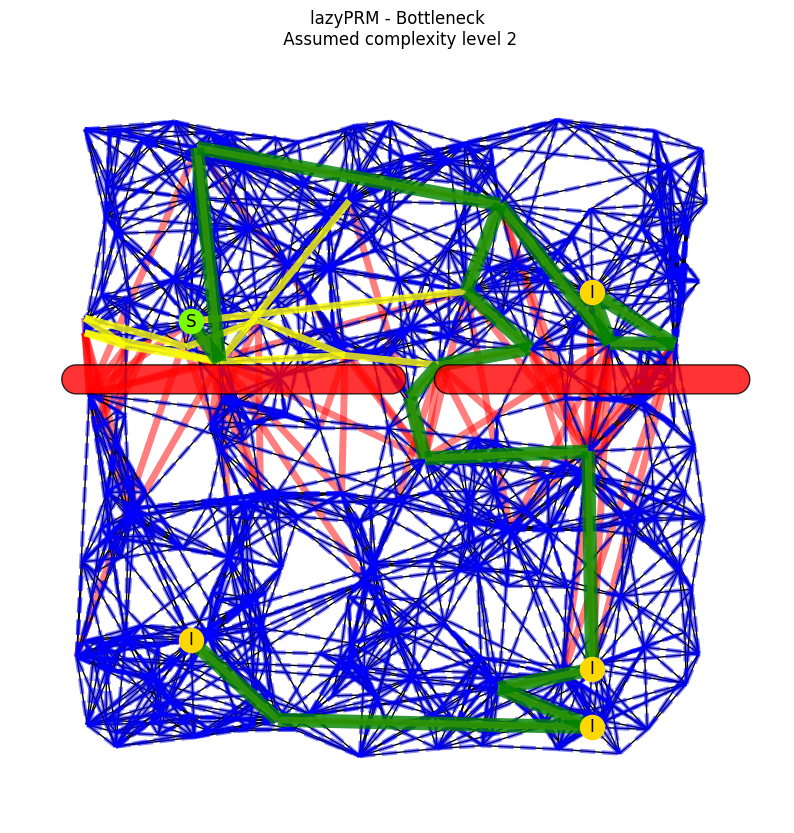

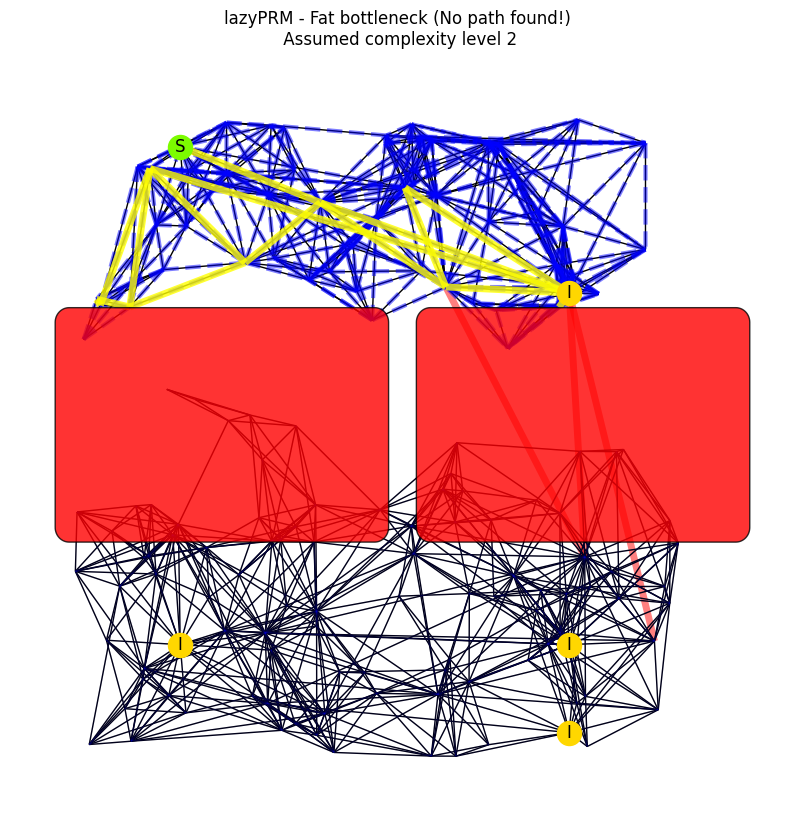

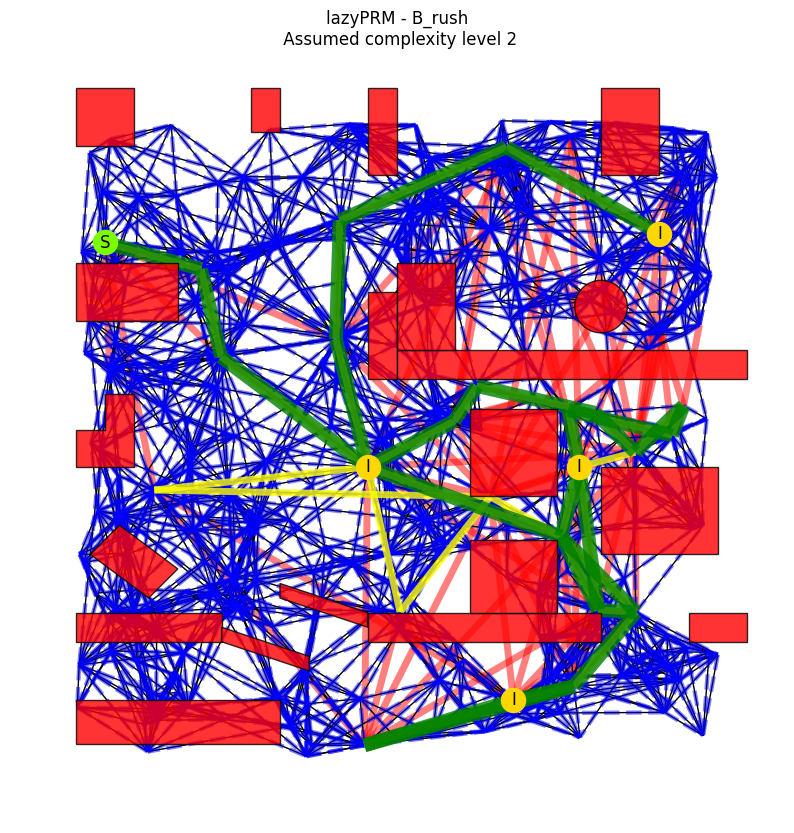

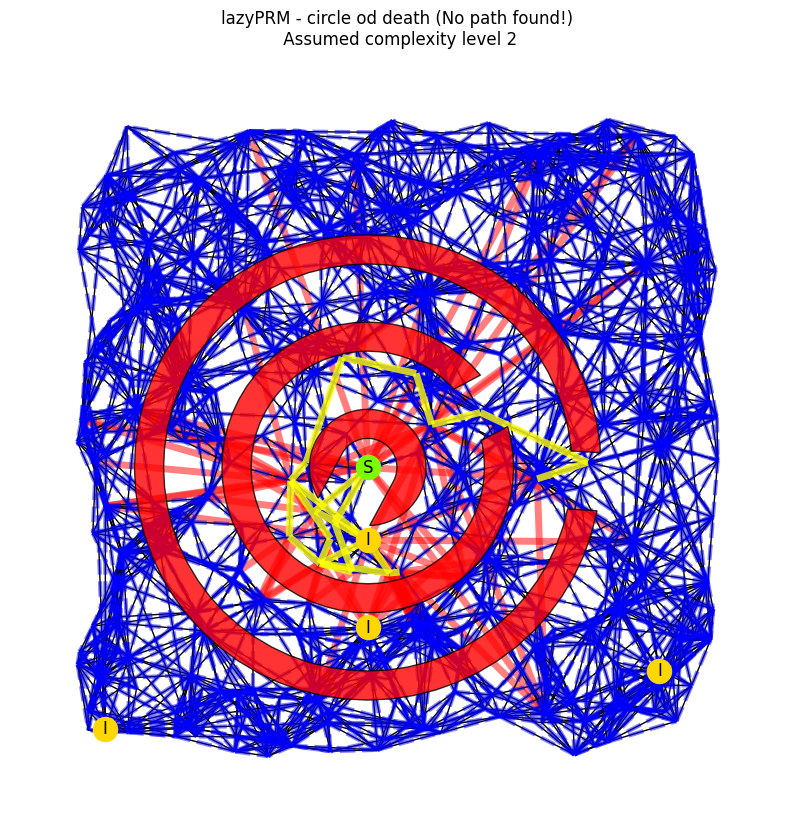

In [36]:
import matplotlib.pyplot as plt

for result in resultList:
    fig_local = plt.figure(figsize=(10,10))
    ax = fig_local.add_subplot(1,1,1)
    title = result.plannerFactoryName + " - " + result.benchmark.name
    if result.solution == []:
        title += " (No path found!)"
    title += "\n Assumed complexity level " + str(result.benchmark.level)
    ax.set_title(title)

    try:
        #IPVISBasicsPRM.basicPRMVisualize(result.planner, result.solution, ax=ax, nodeSize=100))
        plannerFactory[result.plannerFactoryName][2](result.planner, result.solution, ax=ax, nodeSize=100)


    except Exception as e:
        print ("Error")
        print(e)
        pass
    

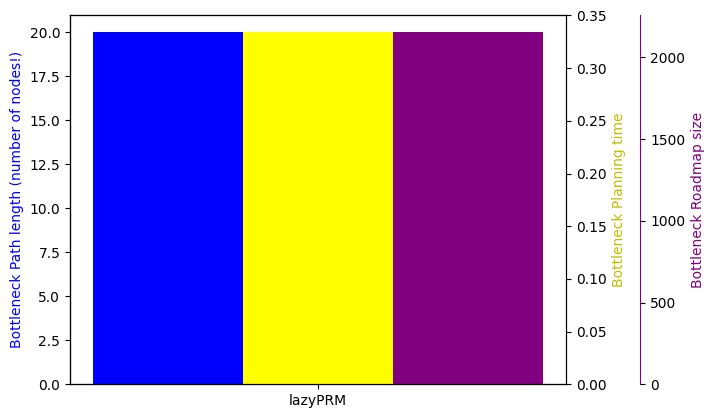

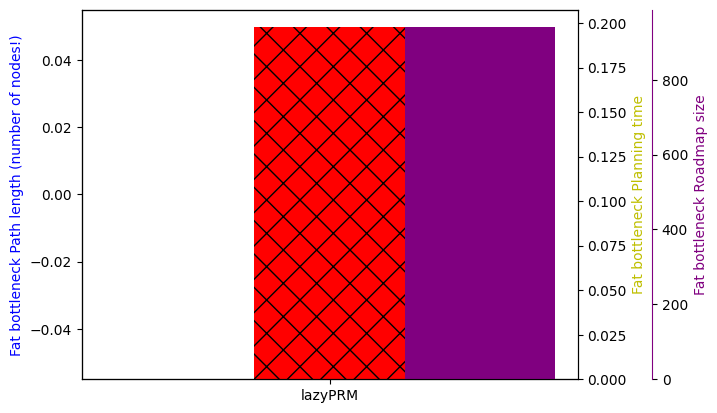

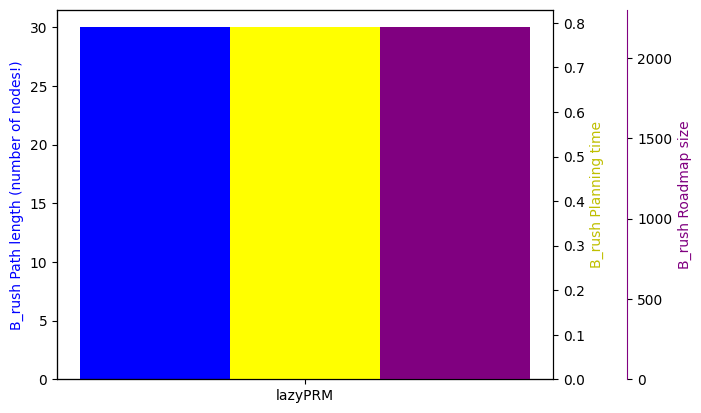

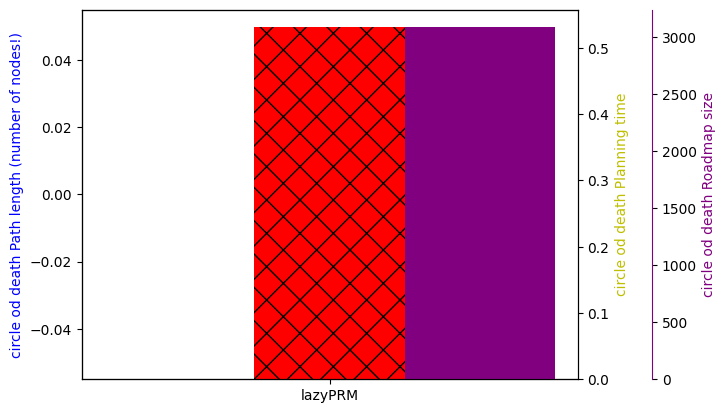

In [37]:
import numpy as np
for bench in testList:
    title = bench.name
    pathLength = dict()
    planningTime = dict()
    roadmapSize  = dict()
    
    try:
        for result in resultList:
            if result.benchmark.name == bench.name:
                #print result.benchmark.name  + " - " +  result.plannerFactoryName, len(result.solution)
                pathLength[result.plannerFactoryName] = len(result.solution)
                planningTime[result.plannerFactoryName] = result.perfDataFrame.groupby(["name"]).sum(numeric_only=True)["time"]["planRoundPath"]
                roadmapSize[result.plannerFactoryName] = result.planner.graph.size()


        fig, ax = plt.subplots()

        width = 0.2

        ax.bar(np.arange(len(pathLength.keys())), pathLength.values(),width, color="blue")
        ax.set_ylabel(title + " Path length (number of nodes!)", color="blue")
        ax.set_xticks(np.arange(len(pathLength.keys())) + width)
        ax.set_xticklabels(pathLength.keys())

        ax2 = ax.twinx()
        bar = ax2.bar(np.arange(len(pathLength.keys()))+width, planningTime.values(),width, color="red")
        ax2.set_ylabel(title + " Planning time", color="y")

        # Add coloring and patterns on axis two
        hatches = ['x' if length==0 else '' for length in pathLength.values()]
        color   = ['red' if length==0 else 'yellow' for length in pathLength.values()]
        for i,thisbar in enumerate(bar.patches):
            thisbar.set_facecolor(color[i])
            thisbar.set_hatch(hatches[i])

        # Multiple axes 
        ax3 = ax.twinx()
        ax3.bar(np.arange(len(pathLength.keys()))+2*width, roadmapSize.values(),width, color="purple")
        ax3.set_ylabel(title + " Roadmap size",  color="purple")
        ax3.spines['right'].set_position(('axes', 1.15))
        ax3.spines['right'].set_color("purple")
    except:
        pass


    
        
    

result.perfDataFrame.groupby(["name"]).sum()

In [38]:
result.perfDataFrame.groupby(["name"]).sum(numeric_only=True)

time
name                                 
_buildRoadmap                0.134493
_checkForCollisionAndUpdate  0.168134
_nearestInterim              0.004004
lineInCollision              0.125626
planRoundPath                0.531215
pointInCollision             0.144141

In [39]:
resultBasic = resultList[:5]
resultVisibility = resultList[5:10]
resultLazy = resultList[10:]

In [40]:
resultBasic[0].perfDataFrame

name  \
0                pointInCollision   
1                pointInCollision   
2                pointInCollision   
3                pointInCollision   
4                pointInCollision   
...                           ...   
3020  _checkForCollisionAndUpdate   
3021  _checkForCollisionAndUpdate   
3022  _checkForCollisionAndUpdate   
3023  _checkForCollisionAndUpdate   
3024                planRoundPath   

                                                   args kwargs  \
0     (<IPEnvironment.CollisionChecker object at 0x0...     {}   
1     (<IPEnvironment.CollisionChecker object at 0x0...     {}   
2     (<IPEnvironment.CollisionChecker object at 0x0...     {}   
3     (<IPEnvironment.CollisionChecker object at 0x0...     {}   
4     (<IPEnvironment.CollisionChecker object at 0x0...     {}   
...                                                 ...    ...   
3020  (<IPLazyPRM_Roundtrip.LazyPRM object at 0x0000...     {}   
3021  (<IPLazyPRM_Roundtrip.LazyPRM object at 0x0000...     {}   
3022  (<IPLazyPRM_Roundtrip.LazyPRM object at 0x0000...     {}   
3023  (<IPLazyPRM_Roundtrip.LazyPRM object at 0x0000...     {}   
3024  (<IPLazyPRM_Roundtrip.LazyPRM object at 0x0000...     {}   

                                                 retVal      time  
0                                                 False  0.001002  
1                                                 False  0.000000  
2                                                 False  0.000000  
3                                                 False  0.000000  
4                                                 False  0.000000  
...                                                 ...       ...  
3020                                              False  0.001002  
3021                                              False  0.000999  
3022                                              False  0.001000  
3023                                              False  0.001998  
3024  [start, 17, 20, 14, 2, 7, interim1, 2, 14, 1, ...  0.334066  

[3025 rows x 5 columns]

In [41]:
for i in range(len(resultBasic)):
    print(resultBasic[i].perfDataFrame.groupby(["name"]).sum(numeric_only=True).sum())

time    0.674185
dtype: float64
time    0.345619
dtype: float64
time    2.214524
dtype: float64
time    1.107612
dtype: float64


In [42]:
for i in range(len(resultVisibility)):

    print(resultVisibility[i].perfDataFrame.groupby(["name"]).sum(numeric_only=True).sum())


In [43]:
for i in range(len(resultLazy)):

    print(resultLazy[i].perfDataFrame.groupby(["name"]).sum(numeric_only=True).sum())


In [44]:
result.perfDataFrame[result.perfDataFrame["name"]=="planRoundPath"][result.perfDataFrame["retVal"]==False]["time"].sum(numeric_only=True)

C:\Users\andre\AppData\Local\Temp\ipykernel_14084\2940436852.py:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  result.perfDataFrame[result.perfDataFrame["name"]=="planRoundPath"][result.perfDataFrame["retVal"]==False]["time"].sum(numeric_only=True)


0.0

In [45]:
result.perfDataFrame[result.perfDataFrame["name"]=="planRoundPath"]

name                                               args kwargs  \
2281  planRoundPath  (<IPLazyPRM_Roundtrip.LazyPRM object at 0x0000...     {}   

     retVal      time  
2281     []  0.531215

In [46]:
result.perfDataFrame[result.perfDataFrame["name"]=="planRoundPath"][result.perfDataFrame["retVal"]==False]["time"].sum(numeric_only=True)

C:\Users\andre\AppData\Local\Temp\ipykernel_14084\2940436852.py:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  result.perfDataFrame[result.perfDataFrame["name"]=="planRoundPath"][result.perfDataFrame["retVal"]==False]["time"].sum(numeric_only=True)


0.0